In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# read the data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# EDA (Exploratiry data analysis)

In [3]:
data.shape

(31647, 18)

In [4]:
data.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [5]:
data['subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
data.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [9]:
data.nunique().to_frame("No.  of unique values")

,No. of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


# drop the columns

In [10]:
data.drop("ID",axis = 1, inplace = True)
data.drop("age",axis = 1, inplace=True)

In [11]:
data.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# split the data  into 2 parts categorical and numerical 

In [12]:
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical columns: ", categorical_col)
print("\n")


numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns: ",numerical_col)

categorical columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


numerical columns:  ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [13]:
data.describe()

,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64


yes    17584
no     14063
Name: housing, dtype: int64


no     26516
yes     5131
Name: loan, dtype: int64


cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


20    1909
18    1612
21    1445
5     1373
6     1348
17

# Data visualization

In [15]:
data['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

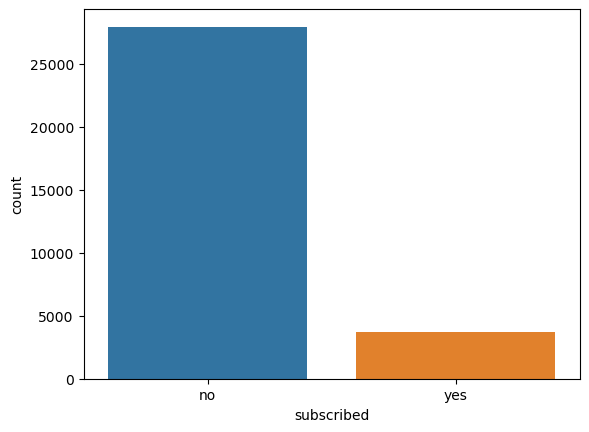

In [16]:
subs = sns.countplot(x='subscribed',data=data)
plt.show()

In [17]:
data['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

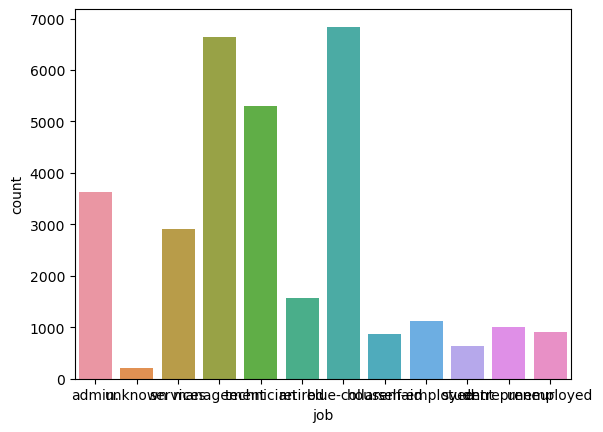

In [18]:
subs = sns.countplot(x='job',data=data)
plt.show()

In [19]:
data['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

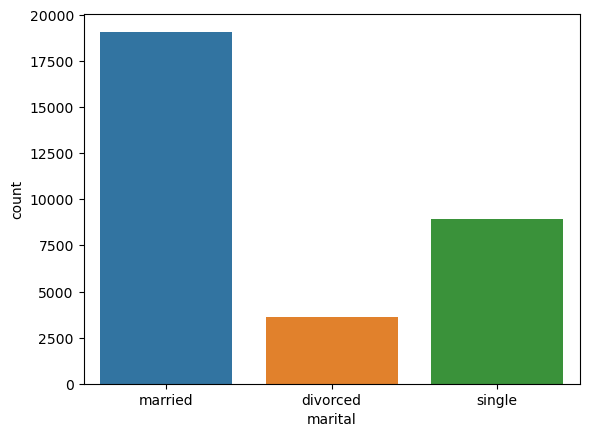

In [20]:
subs = sns.countplot(x='marital',data=data)
plt.show()

In [21]:
data['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

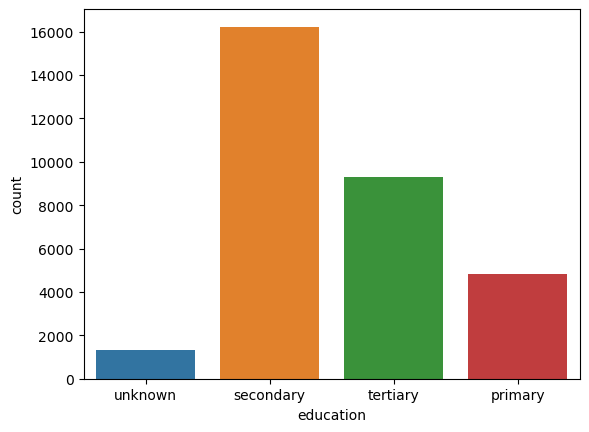

In [22]:
subs = sns.countplot(x='education',data=data)
plt.show()

In [23]:
data['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

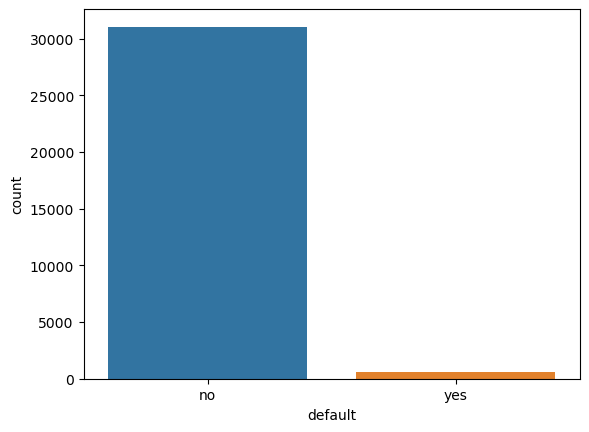

In [24]:
subs = sns.countplot(x='default',data=data)
plt.show()

In [25]:
data['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

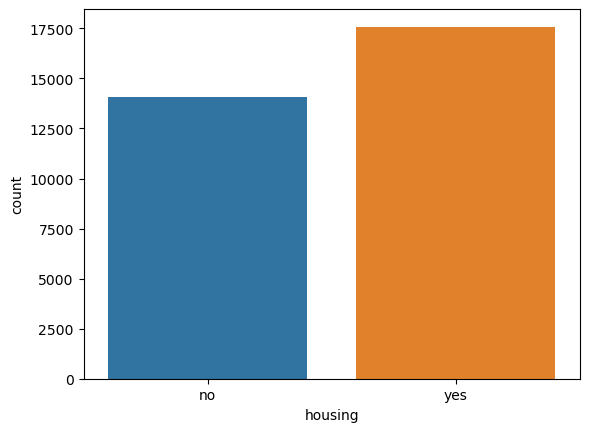

In [26]:
subs = sns.countplot(x='housing',data=data)
plt.show()

In [27]:
data['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

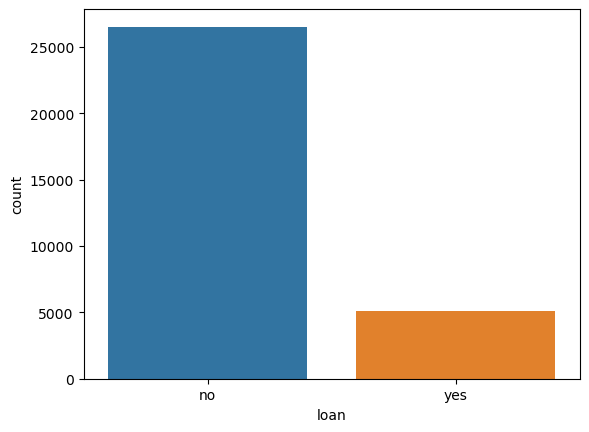

In [28]:
subs = sns.countplot(x='loan',data=data)
plt.show()

In [29]:
data['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

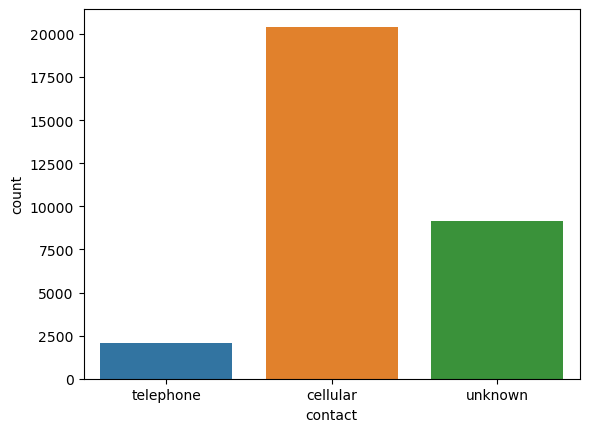

In [30]:
subs = sns.countplot(x='contact',data=data)
plt.show()

In [31]:
data['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

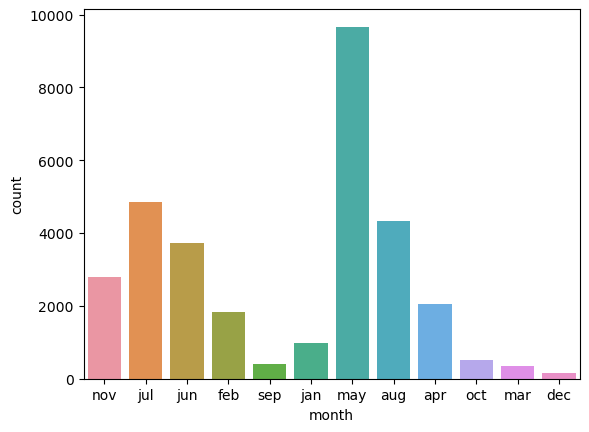

In [32]:
subs = sns.countplot(x='month',data=data)
plt.show()

In [33]:
data['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

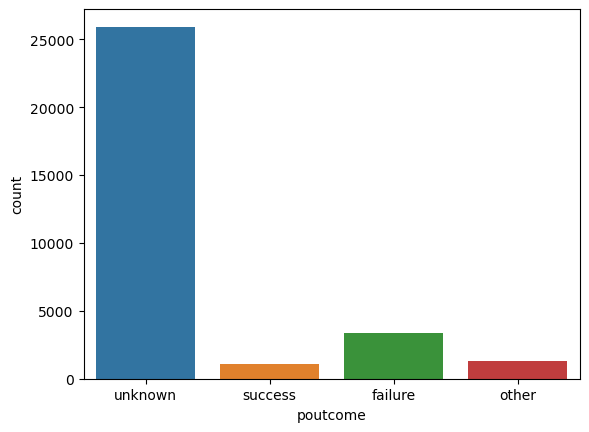

In [34]:
subs = sns.countplot(x='poutcome',data=data)
plt.show()

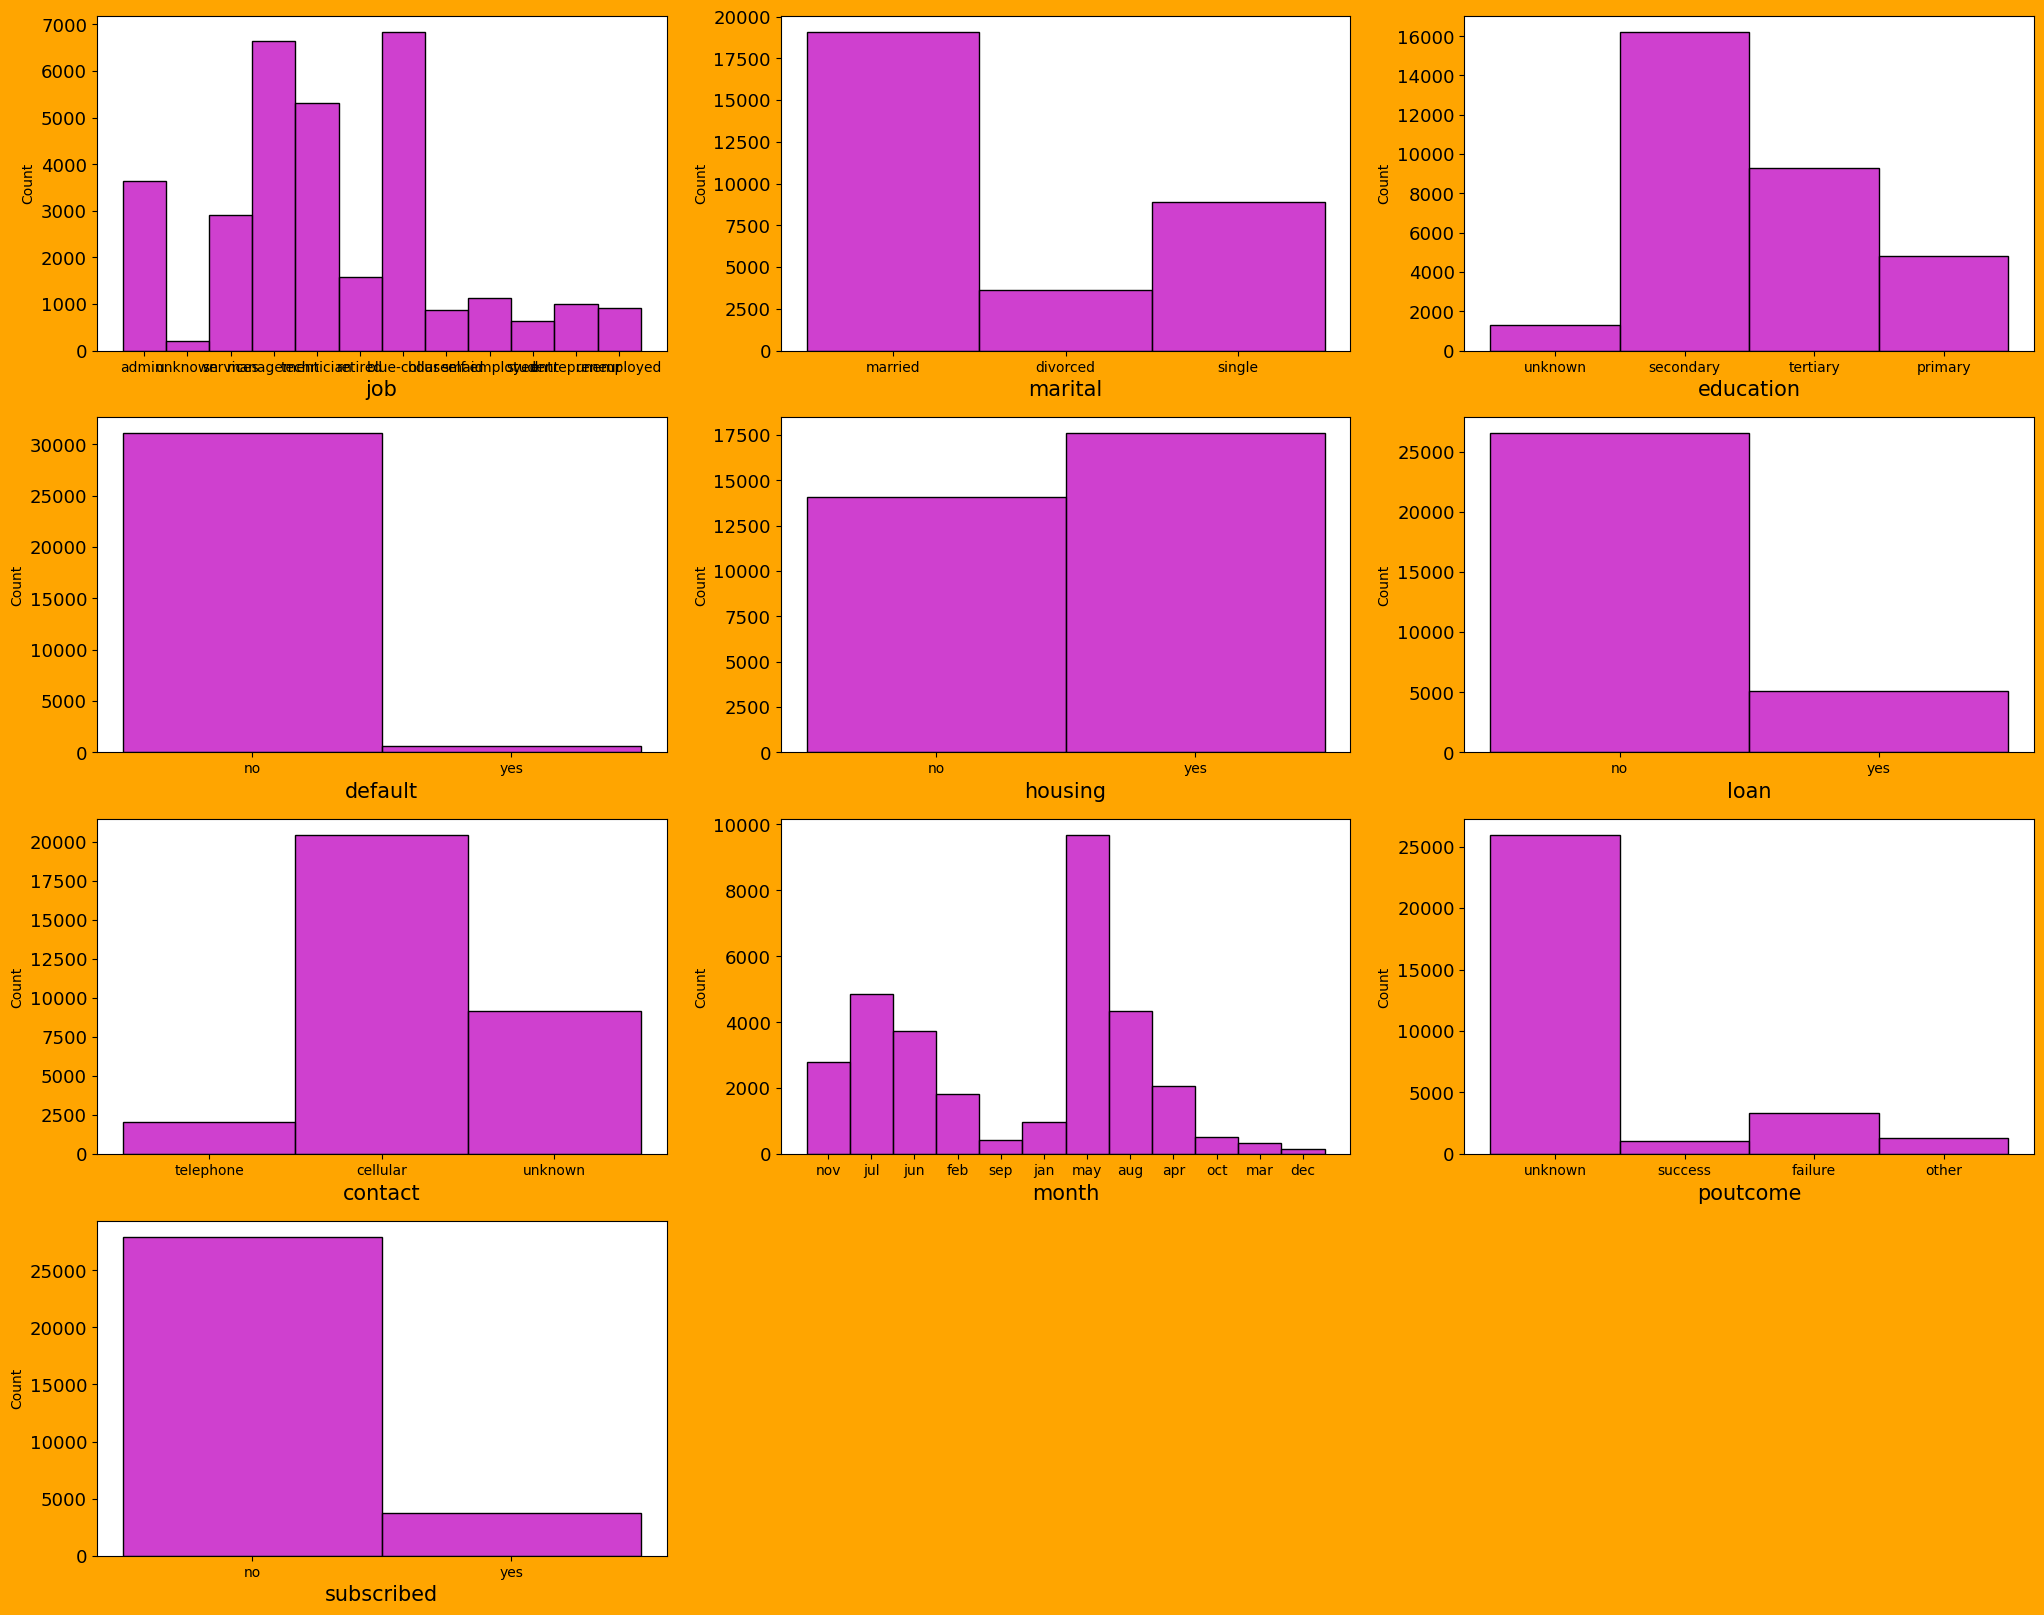

In [35]:
plt.figure(figsize = (25, 20), facecolor = 'orange')
plotnumber = 1
for col in categorical_col:
    if plotnumber<=10:
        ax=plt.subplot(4,3, plotnumber)
        sns.histplot(data[col],color = "m")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.show()

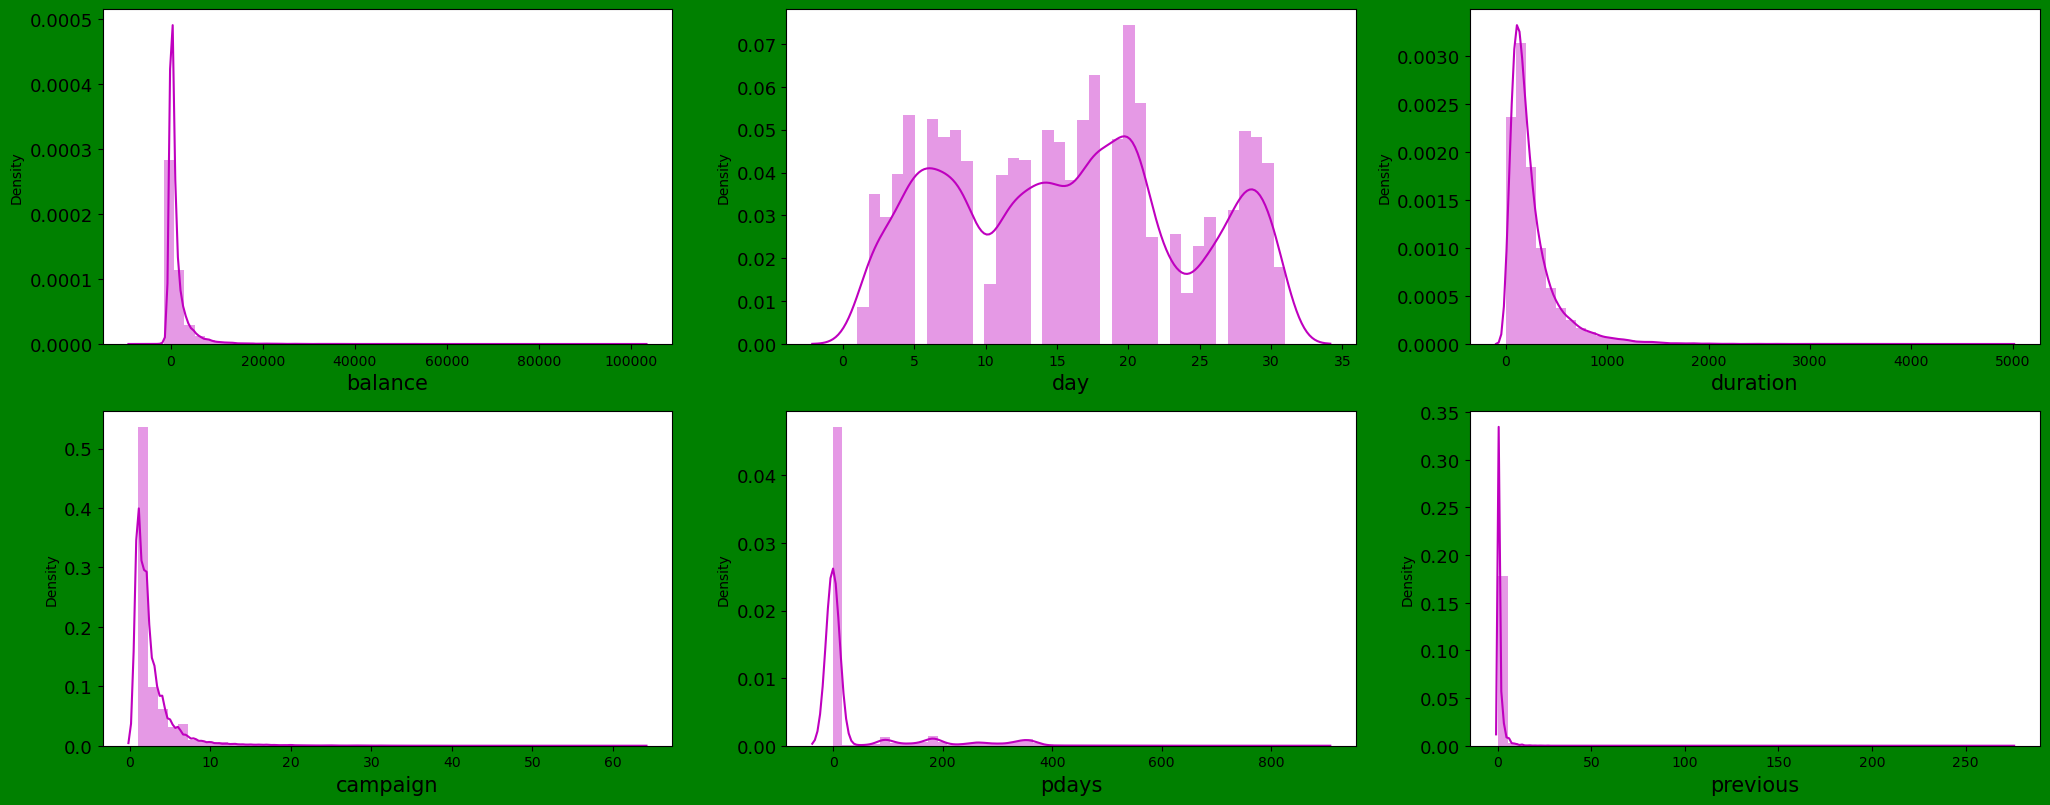

In [36]:
plt.figure(figsize = (25, 20), facecolor = 'green')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,3, plotnumber)
        sns.distplot(data[col],color = "m")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.show()

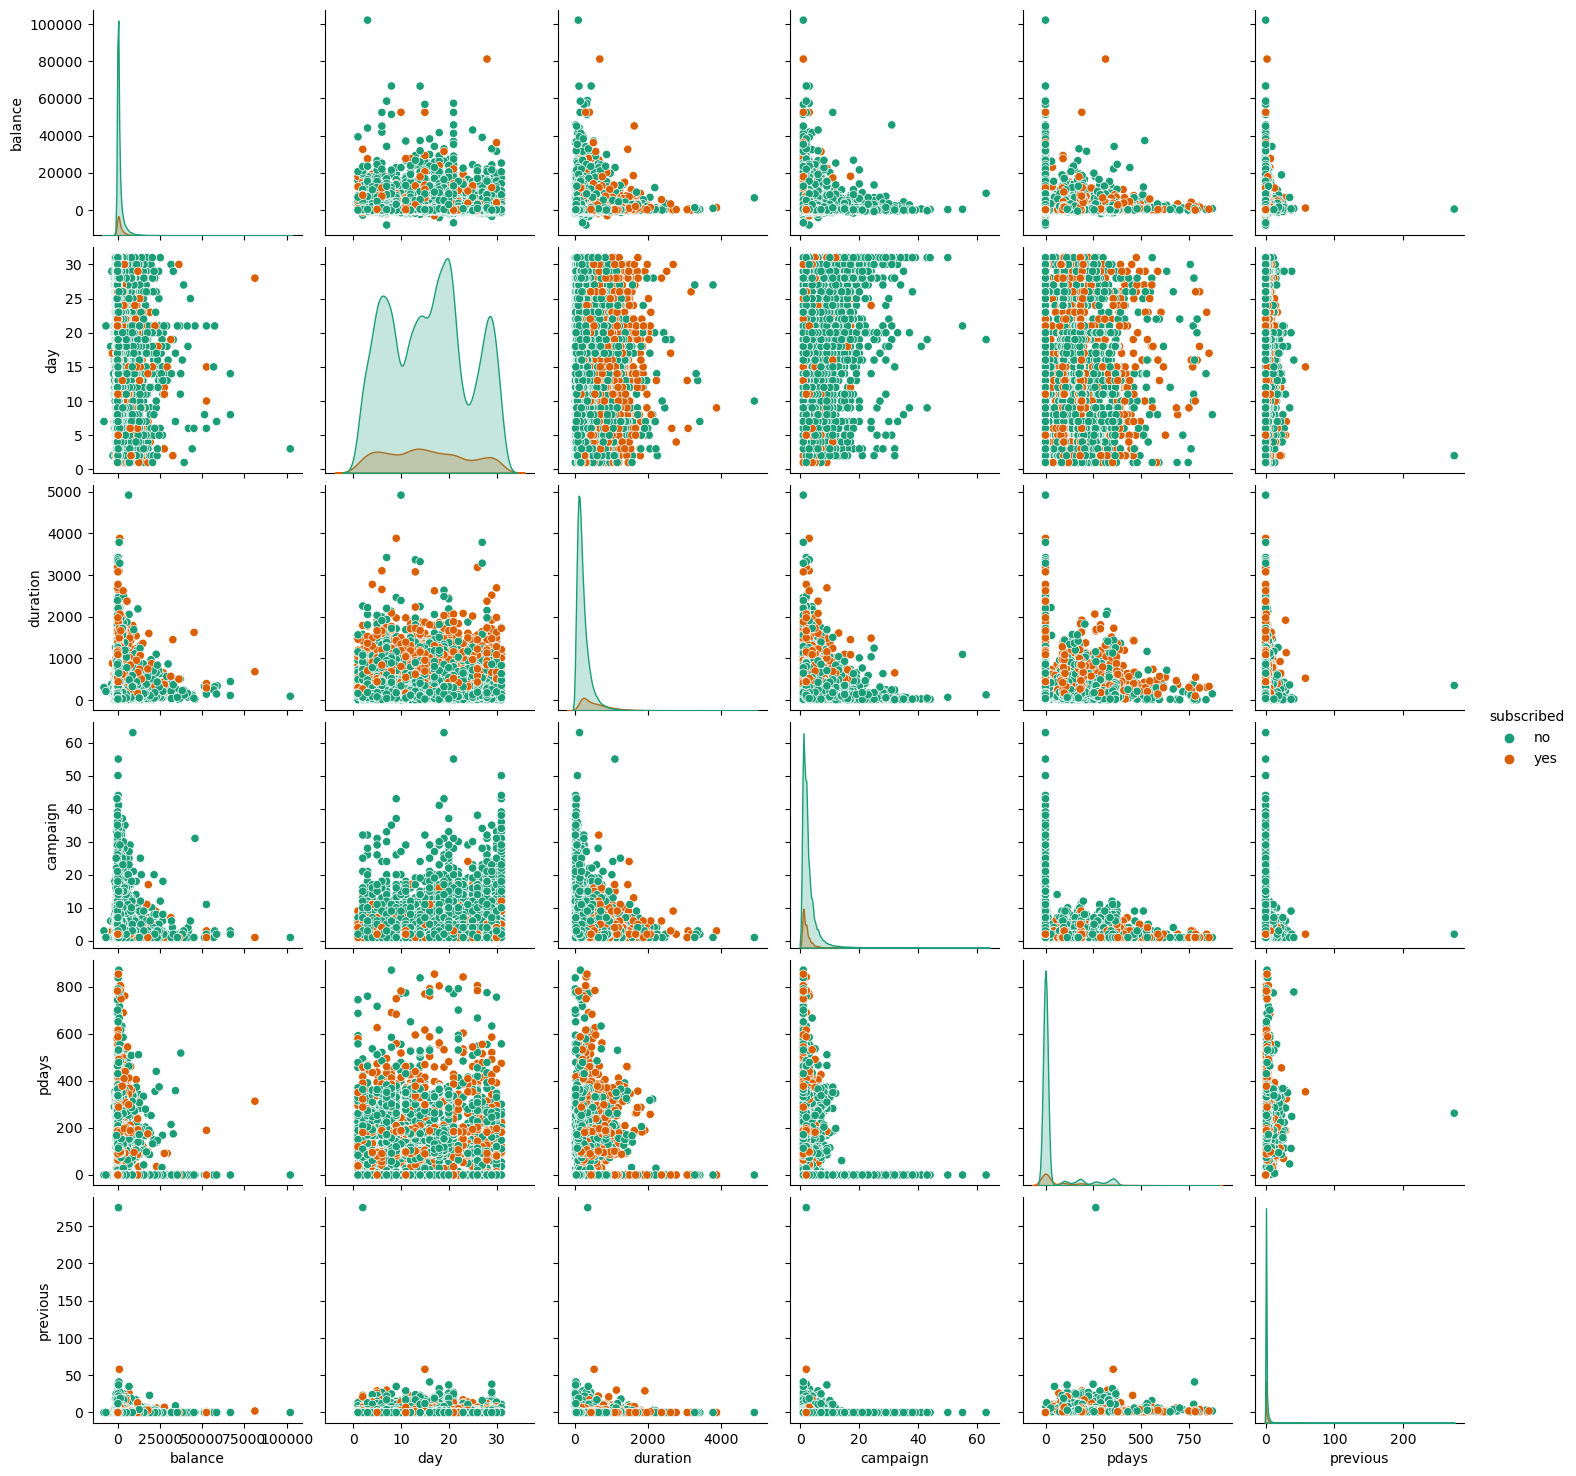

In [37]:
sns.pairplot(data, hue = "subscribed", palette = "Dark2")
plt.show()

# Encoding the data

In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [39]:
ord_enc = OrdinalEncoder()
for i in data.columns:
    if data [i].dtypes=='object':
        data[i] = ord_enc.fit_transform(data[i].values.reshape(-1,1))
data

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [40]:
x=data.iloc[:,0:-1]

In [41]:
import statsmodels.stats as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [42]:
vif=pd.DataFrame()
vif['variables']=x.columns
vif['vif factor']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,variables,vif factor
0,job,2.802684
1,marital,4.514437
2,education,3.725906
3,default,1.031581
4,balance,1.223479
5,housing,2.527102
6,loan,1.208185
7,contact,1.990453
8,day,4.503405
9,month,5.157153


In [43]:
x=data.iloc[:,:-1]
x.shape

(31647, 15)

In [44]:
data

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [45]:
data.dtypes

job           float64
marital       float64
education     float64
default       float64
balance         int64
housing       float64
loan          float64
contact       float64
day             int64
month         float64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome      float64
subscribed    float64
dtype: object

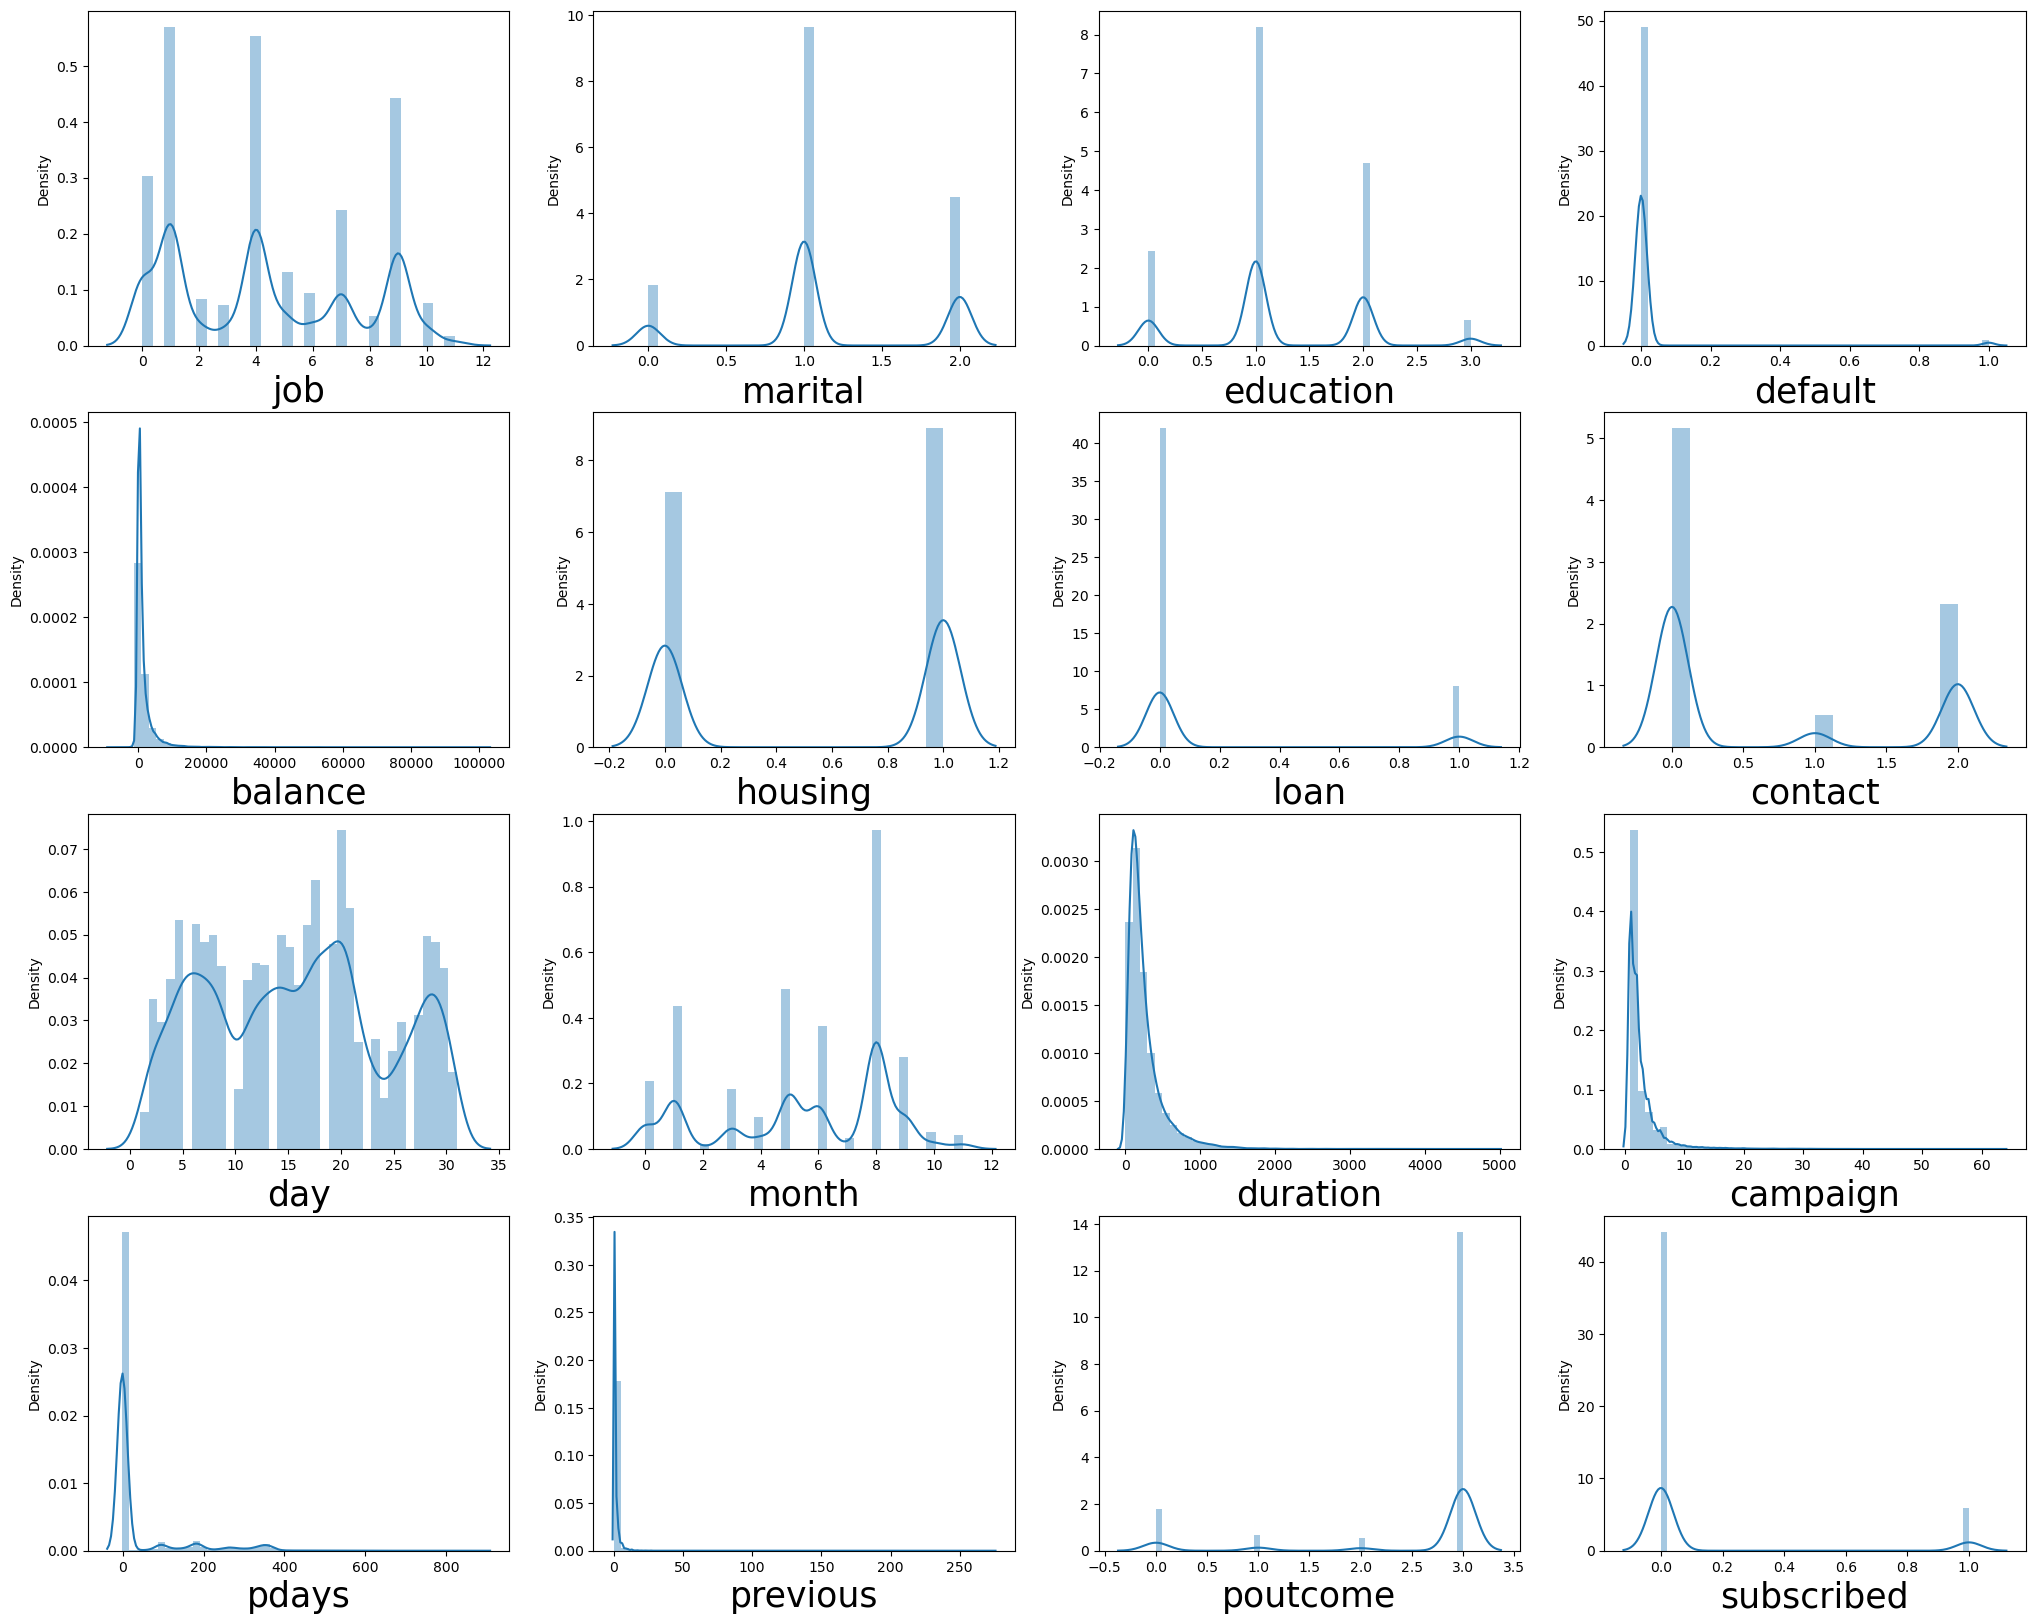

In [46]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

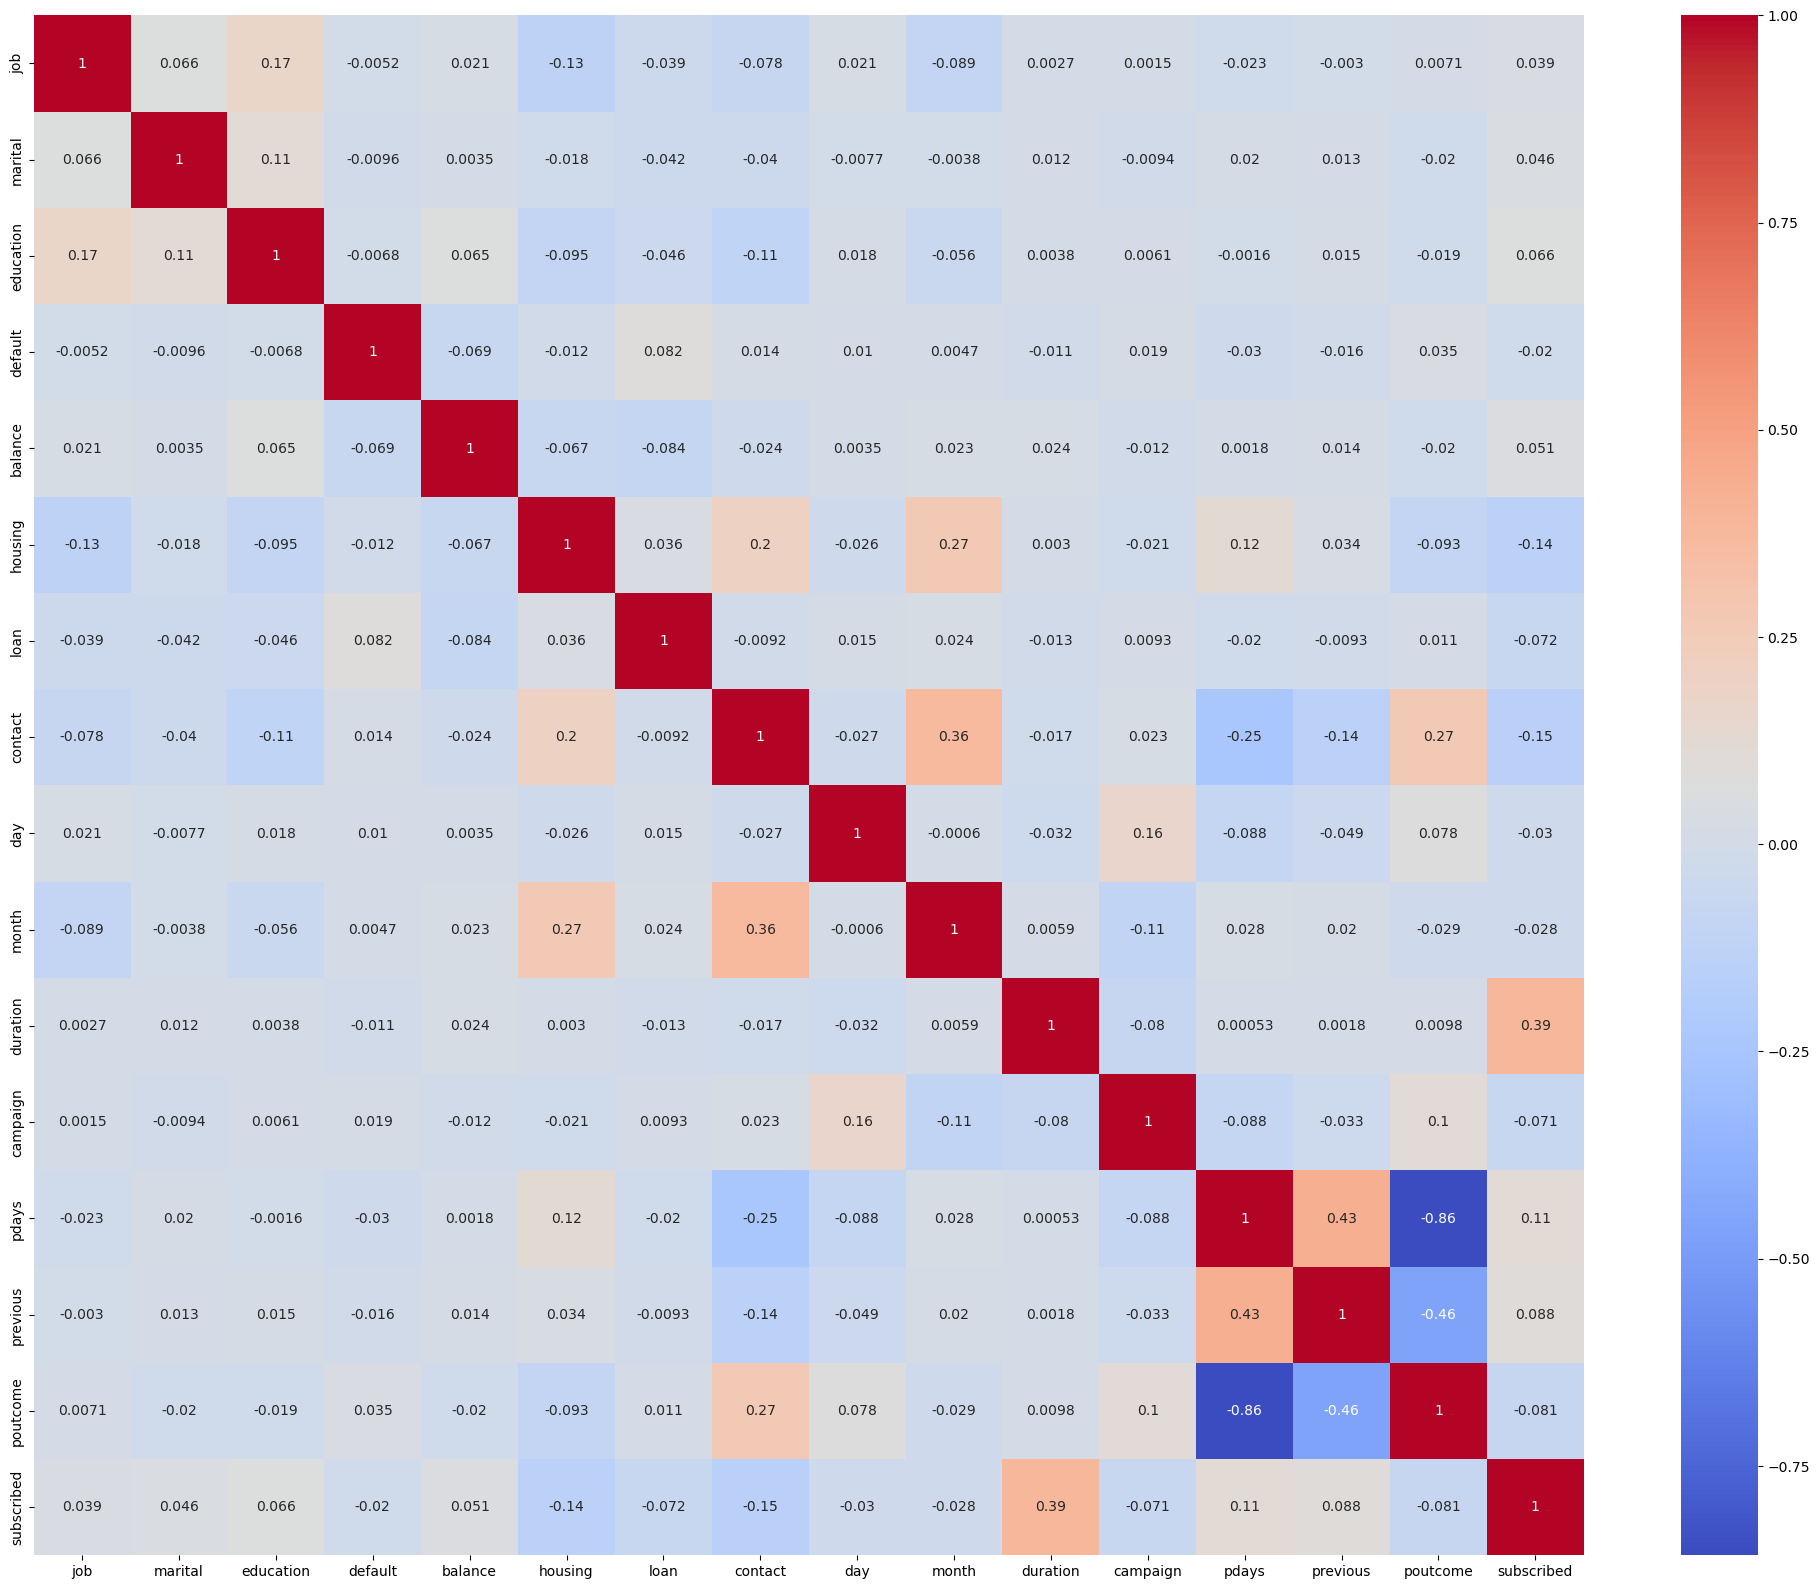

In [47]:
plt.figure(figsize = (25,20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show

# check the skewness

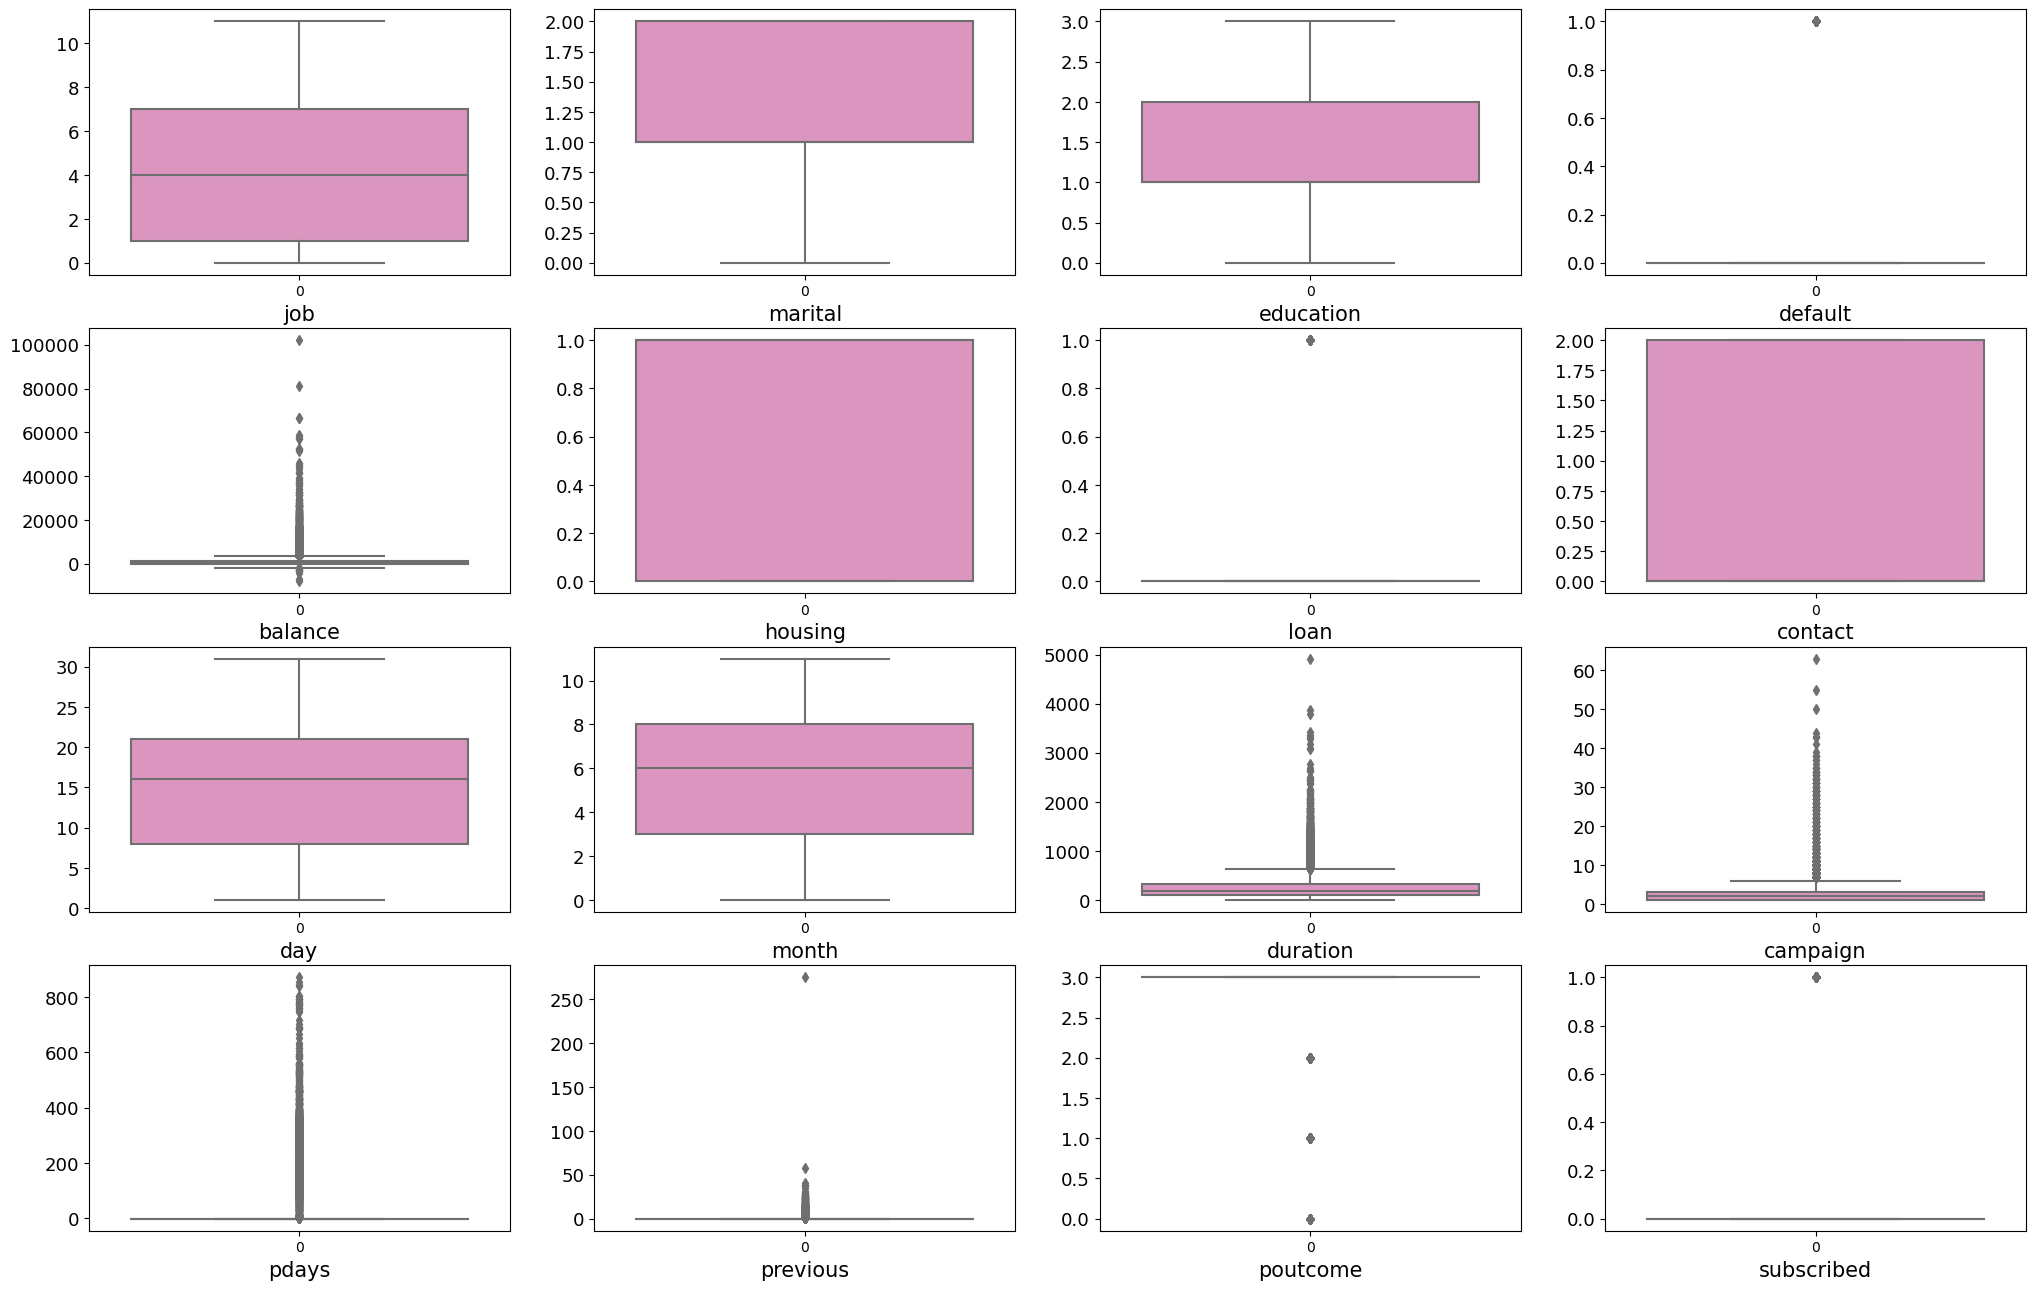

In [48]:
plt.figure(figsize = (25, 20), facecolor = 'white')
plotnumber = 1
for col in data:
    if plotnumber<=16:
        ax=plt.subplot(5,4, plotnumber)
        sns.boxplot(data[col],palette= "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.show()

In [49]:
data.skew()

job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

# remove the skewness

In [50]:

data['default']= np.sqrt(data['default'])
data['balance']= np.sqrt(data['balance'])
data['loan']= np.sqrt(data['loan'])
data['duration']= np.sqrt(data['duration'])
data['campaign']= np.sqrt(data['campaign'])
data['previous']= np.sqrt(data['previous'])
data['poutcome']= np.sqrt(data['poutcome'])

In [51]:
data.skew()

job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       1.886565
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      1.179872
campaign      2.225079
pdays         2.642374
previous      2.979019
poutcome     -2.264295
subscribed    2.377445
dtype: float64

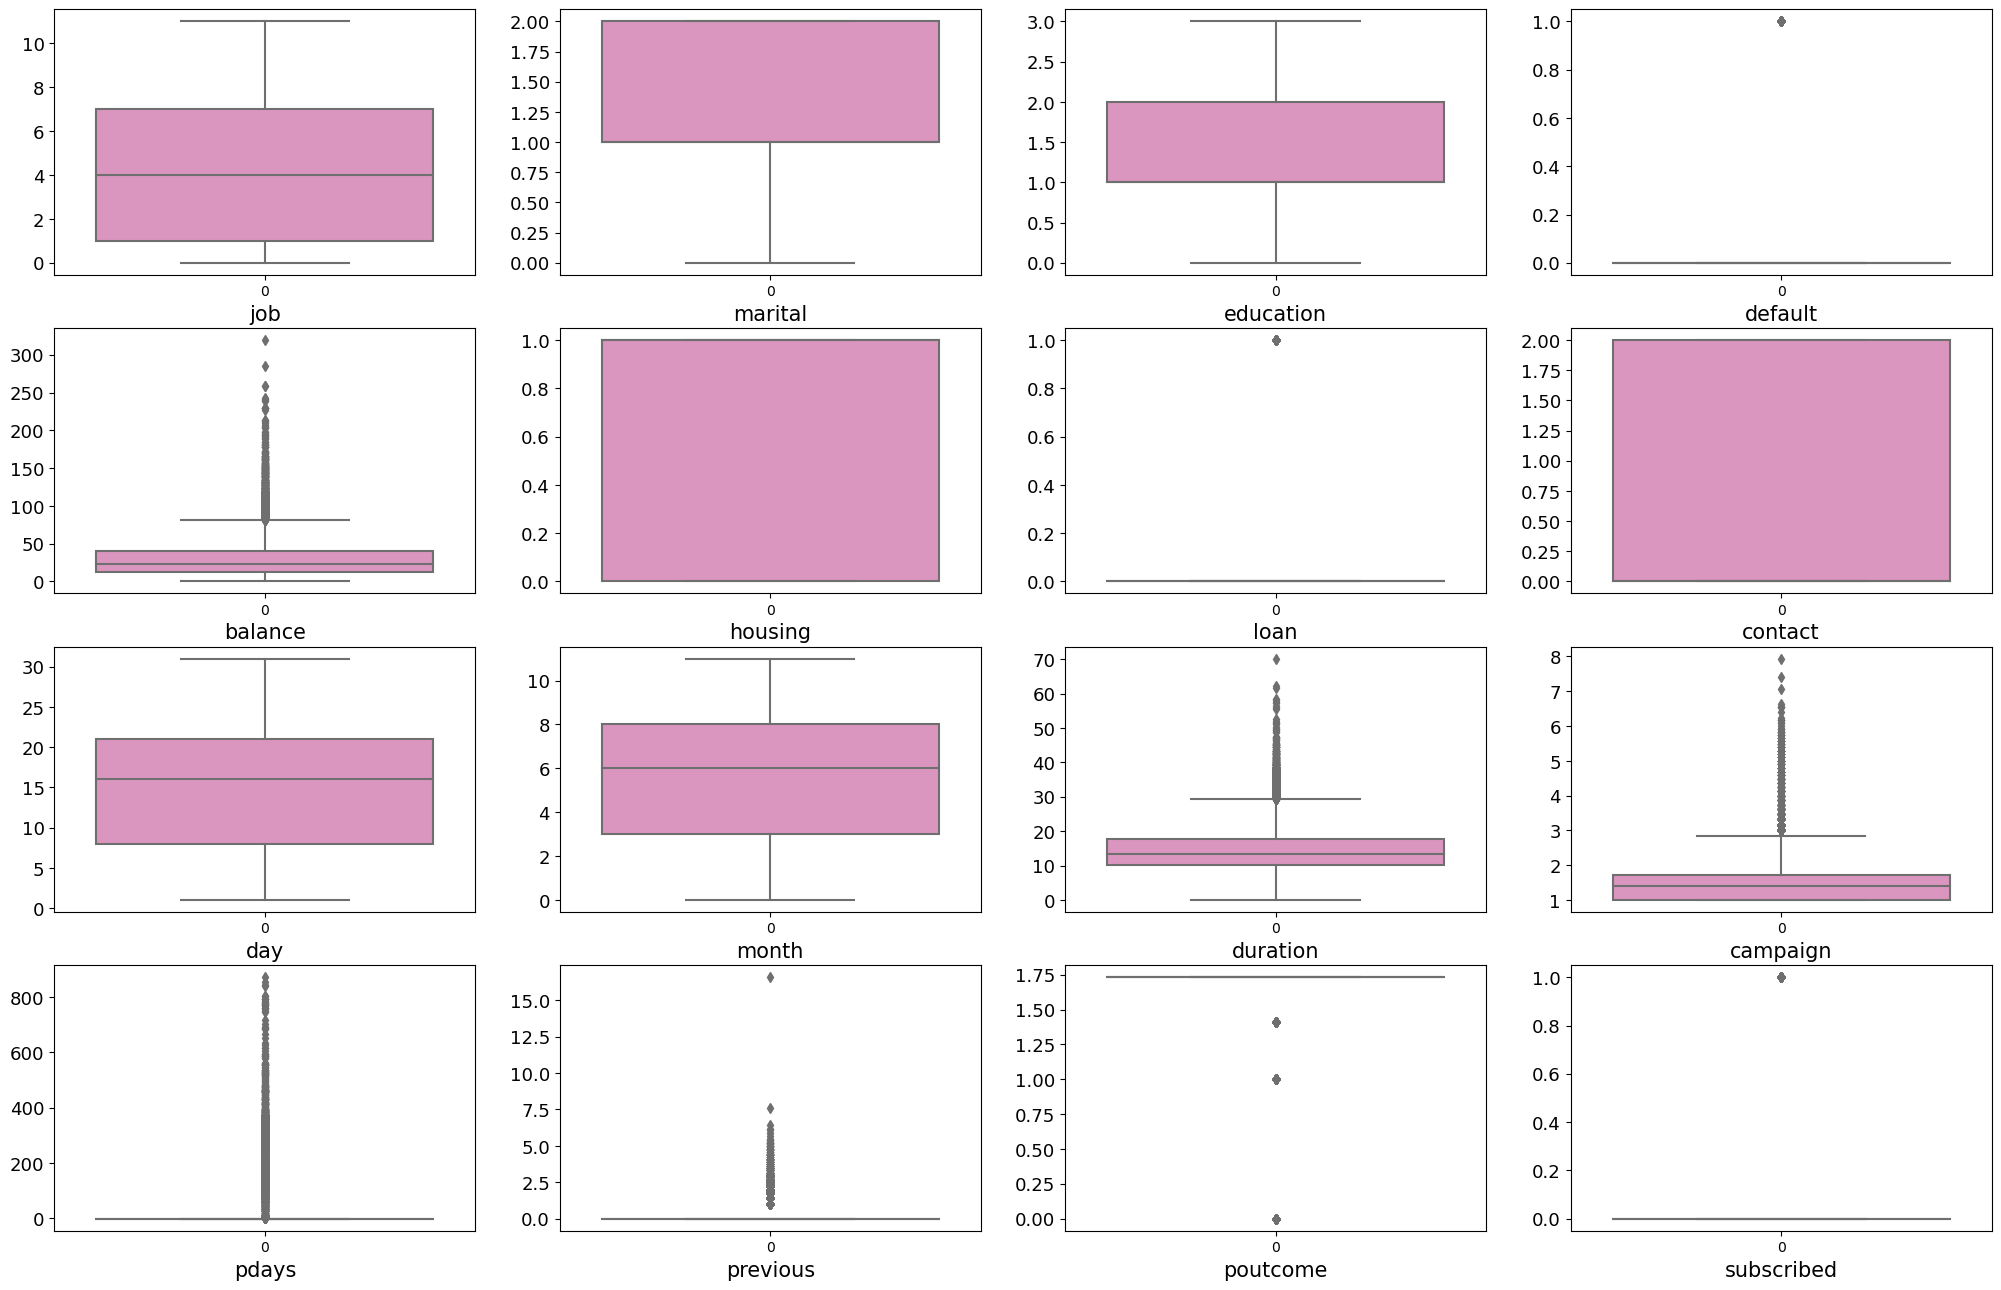

In [52]:
plt.figure(figsize = (25, 20), facecolor = 'white')
plotnumber = 1
for col in data:
    if plotnumber<=16:
        ax=plt.subplot(5,4, plotnumber)
        sns.boxplot(data[col],palette= "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.show()

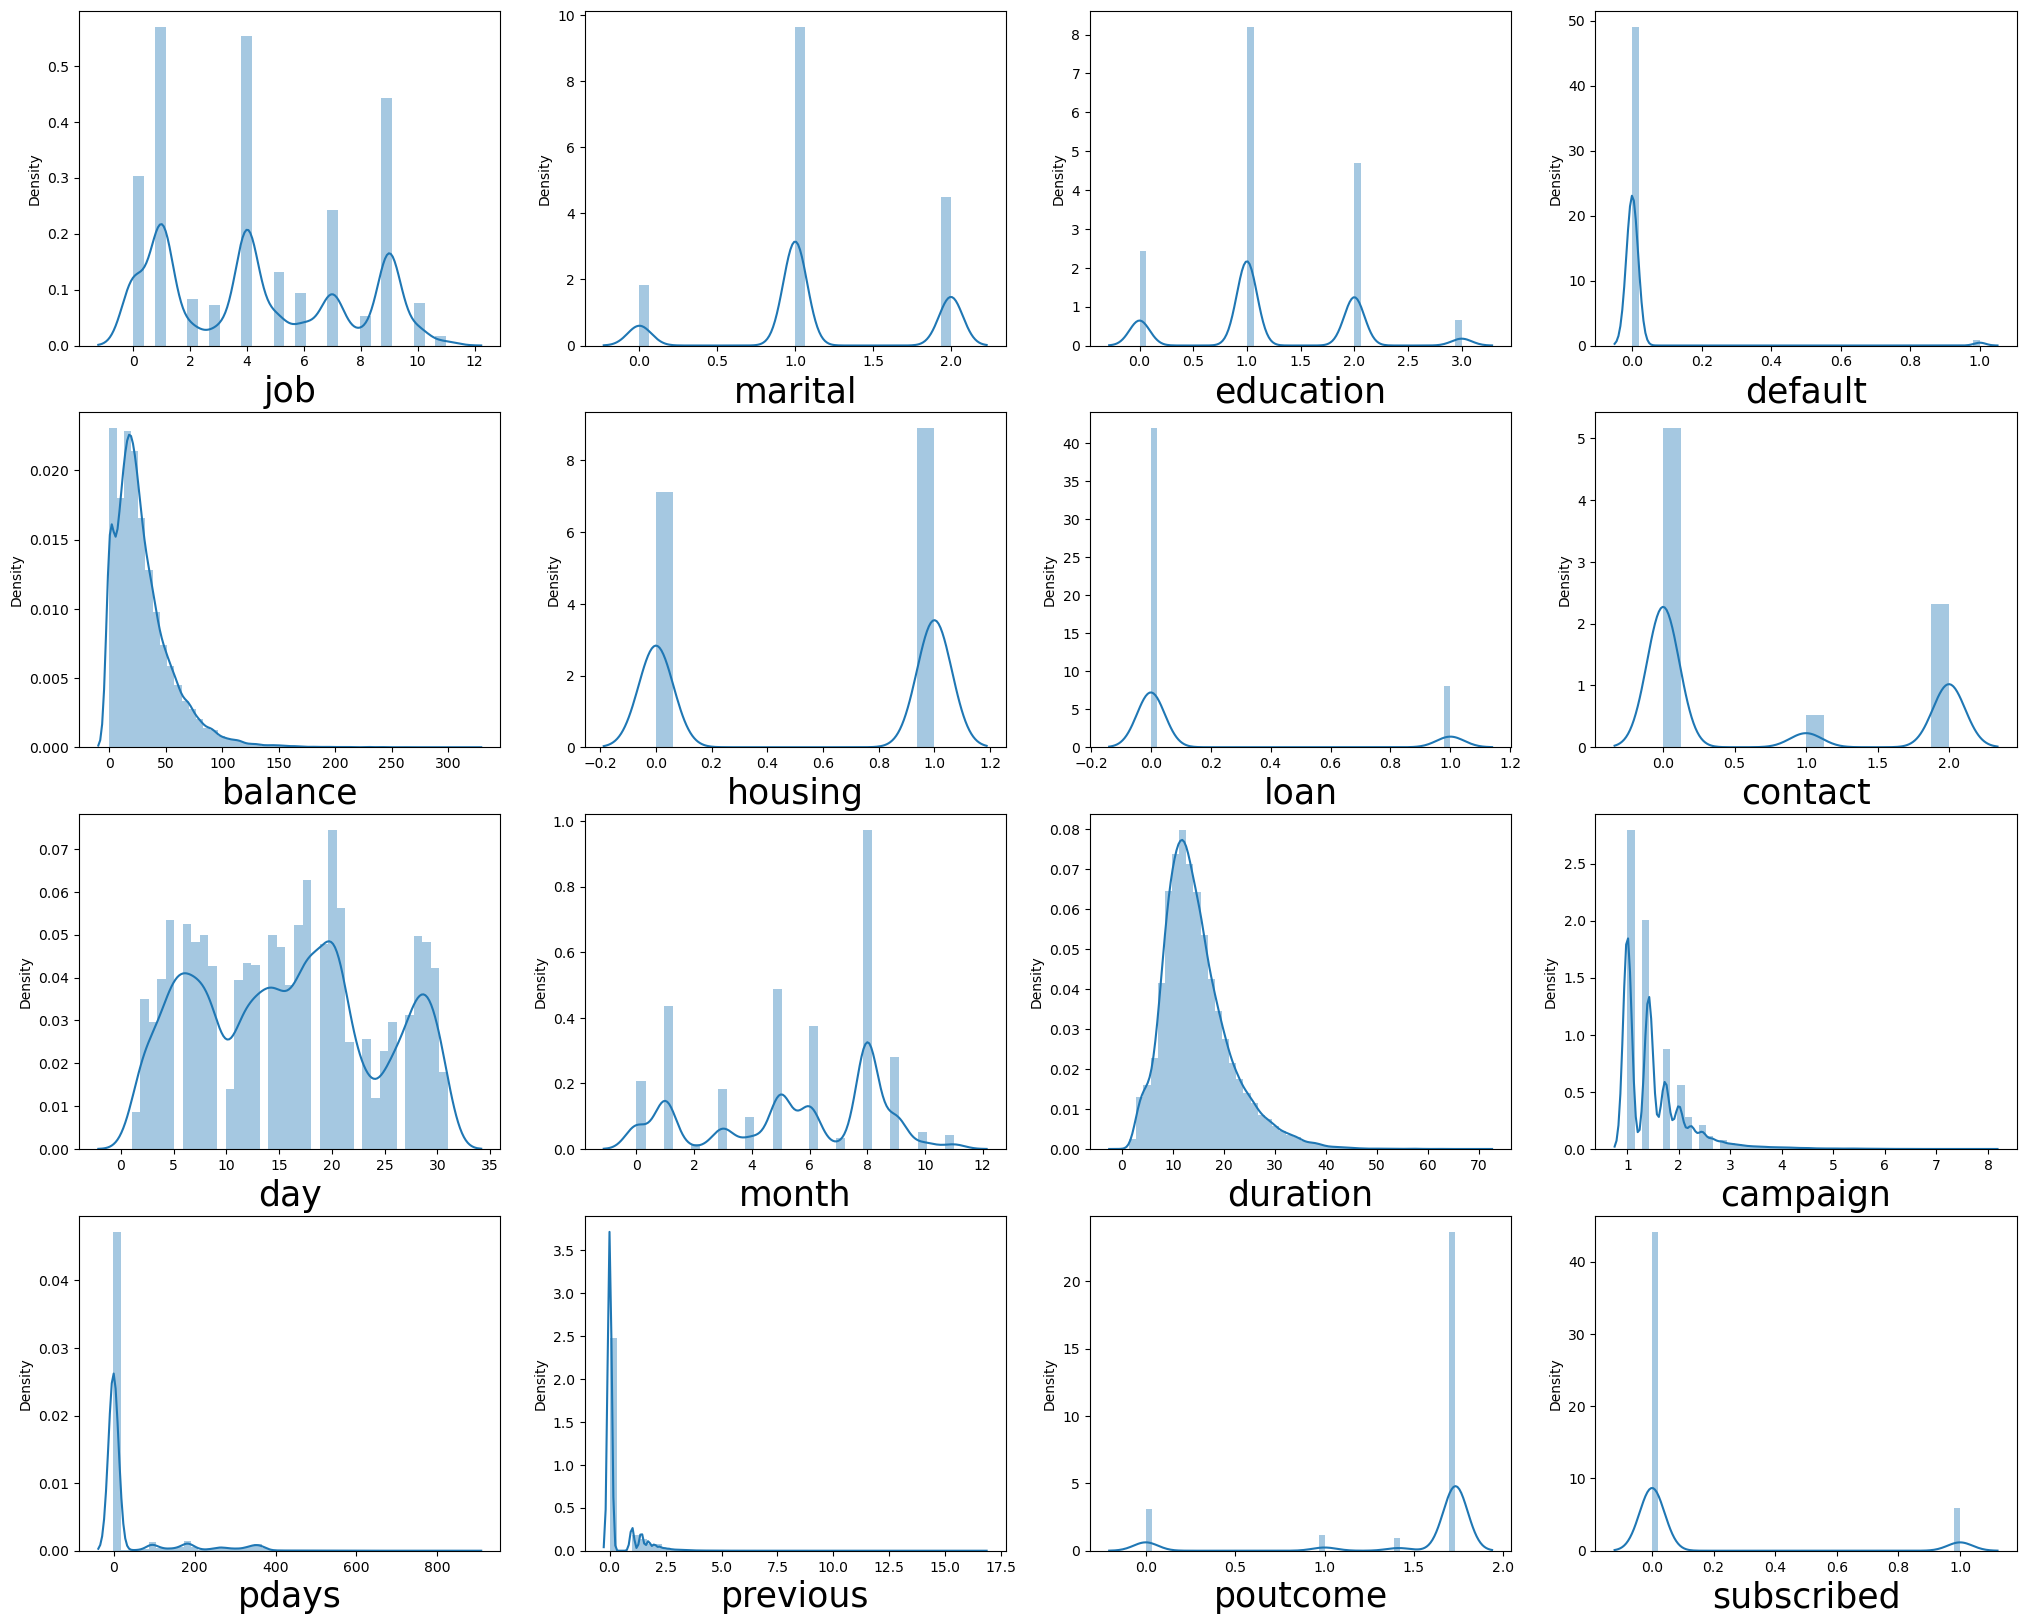

In [53]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

# split the  features and target data into two parts 

In [54]:
X=data.drop("subscribed", axis=True)
Y=data["subscribed"]

In [55]:
X

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.0,1.0,3.0,0.0,43.965896,0.0,0.0,1.0,19,9.0,6.633250,1.414214,-1,0.000000,1.732051
1,11.0,1.0,1.0,0.0,1.732051,0.0,0.0,0.0,20,5.0,9.539392,1.414214,-1,0.000000,1.732051
2,7.0,1.0,1.0,0.0,29.849623,1.0,0.0,0.0,18,5.0,15.491933,1.000000,-1,0.000000,1.732051
3,4.0,0.0,2.0,0.0,57.332364,0.0,0.0,0.0,22,6.0,29.444864,1.000000,84,1.732051,1.414214
4,9.0,1.0,1.0,0.0,10.908712,1.0,0.0,0.0,4,3.0,19.493589,1.000000,-1,0.000000,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,4.0,2.0,2.0,0.0,0.000000,1.0,0.0,0.0,12,8.0,10.770330,1.414214,-1,0.000000,1.732051
31643,4.0,0.0,2.0,0.0,19.493589,0.0,1.0,0.0,5,6.0,20.928450,1.414214,-1,0.000000,1.732051
31644,4.0,2.0,2.0,0.0,17.663522,0.0,0.0,0.0,7,1.0,6.082763,1.732051,-1,0.000000,1.732051
31645,9.0,1.0,1.0,0.0,15.000000,1.0,0.0,1.0,15,8.0,4.690416,2.645751,337,3.464102,0.000000


In [56]:
Y

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
31642    0.0
31643    1.0
31644    0.0
31645    0.0
31646    1.0
Name: subscribed, Length: 31647, dtype: float64

In [57]:
data.dtypes

job           float64
marital       float64
education     float64
default       float64
balance       float64
housing       float64
loan          float64
contact       float64
day             int64
month         float64
duration      float64
campaign      float64
pdays           int64
previous      float64
poutcome      float64
subscribed    float64
dtype: object

# Train and test the data 

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.27, random_state=5)

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
X_scaled

array([[-1.324317  , -0.27540549,  2.36922937, ..., -0.40855484,
        -0.42065669,  0.41442715],
       [ 2.03772948, -0.27540549, -0.30034505, ..., -0.40855484,
        -0.42065669,  0.41442715],
       [ 0.81516712, -0.27540549, -0.30034505, ..., -0.40855484,
        -0.42065669,  0.41442715],
       ...,
       [-0.10175464,  1.37156305,  1.03444216, ..., -0.40855484,
        -0.42065669,  0.41442715],
       [ 1.4264483 , -0.27540549, -0.30034505, ...,  2.99472279,
         4.53853642, -2.78260906],
       [-0.10175464, -1.92237403, -0.30034505, ..., -0.40855484,
        -0.42065669,  0.41442715]])

In [62]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n=====================Train Result=================")
        
        print(f"acccuracy score :{accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("\n=====================Test Result==================")
        print(f"accuracy score :{accuracy_score(y_test, pred) * 100:.2f}%")
         
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

# model training using decisiontreeclassifier

In [63]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

# predict the model 

In [64]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


=====================Train Result=================
acccuracy score :93.20%

=====================Test Result==================
accuracy score :89.34%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      7567
         1.0       0.56      0.34      0.42       978

    accuracy                           0.89      8545
   macro avg       0.74      0.65      0.68      8545
weighted avg       0.88      0.89      0.88      8545



# Using hyperparameter tuning

In [65]:
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,15)
}

In [66]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

# train the model

In [67]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [68]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 13, 'min_samples_leaf': 5, 'min_samples_split': 7}


In [69]:
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split =2,max_depth= 14, min_samples_leaf= 4)

clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=4)

# predict the model

In [70]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


=====================Train Result=================
acccuracy score :90.43%

=====================Test Result==================
accuracy score :89.50%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      7567
         1.0       0.59      0.28      0.38       978

    accuracy                           0.90      8545
   macro avg       0.75      0.63      0.66      8545
weighted avg       0.88      0.90      0.88      8545



# Using Random forest classifier train the model

In [71]:
random_clf = RandomForestClassifier()

random_clf.fit(x_train,y_train)

RandomForestClassifier()

# predict the model

In [72]:
metric_score(random_clf,x_train,x_test,y_train,y_test, train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test, train=False)


=====================Train Result=================
acccuracy score :91.57%

=====================Test Result==================
accuracy score :89.94%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      7567
         1.0       0.80      0.16      0.27       978

    accuracy                           0.90      8545
   macro avg       0.85      0.58      0.61      8545
weighted avg       0.89      0.90      0.87      8545



# hyperparameter tuning with random forest classifier 

In [73]:
params = {'n_estimators' :[13,15],
         'criterion' :['entropy','gini'],
         'max_depth' :[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf' :[5,6]
         }

grd = GridSearchCV(random_clf, param_grid=params)
grd.fit(x_train,y_train)

print('best_params = > ',  grd.best_params_)

best_params = >  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 13}


# train the model

In [74]:
random_clf = grd.best_estimator_

random_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=13)

# predict the model

In [75]:
metric_score(random_clf,x_train,x_test,y_train,y_test, train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test, train=False)


=====================Train Result=================
acccuracy score :89.60%

=====================Test Result==================
accuracy score :89.43%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.94      7567
         1.0       0.79      0.10      0.18       978

    accuracy                           0.89      8545
   macro avg       0.84      0.55      0.56      8545
weighted avg       0.88      0.89      0.86      8545



In [77]:
import pickle

In [78]:
filename = 'bankpredictiontrain.pkl'
pickle.dump(clf, open(filename, 'wb'))

# test dataset

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [80]:
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [81]:
data.shape

(13564, 17)

In [82]:
data.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [83]:
data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [84]:
data.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [86]:
data.nunique().to_frame("No.  of unique values")

,No. of unique values
ID,13564
age,75
job,12
marital,3
education,4
default,2
balance,4292
housing,2
loan,2
contact,3


In [87]:
data.drop("ID",axis = 1, inplace = True)
data.drop("age",axis = 1, inplace = True)

In [88]:
data.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [89]:
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical columns: ", categorical_col)
print("\n")


numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns: ",numerical_col)

categorical columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


numerical columns:  ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [90]:
data.describe()

,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [91]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


no     13334
yes      230
Name: default, dtype: int64


 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: balance, Length: 4292, dtype: int64


yes    7546
no     6018
Name: housing, dtype: int64


no     11451
yes     2113
Name: loan, dtype: int64


cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64


20    843
18    696
17    595
6     584
21    581
7     577
14    565
8     561


In [92]:
data['job'].value_counts()

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64

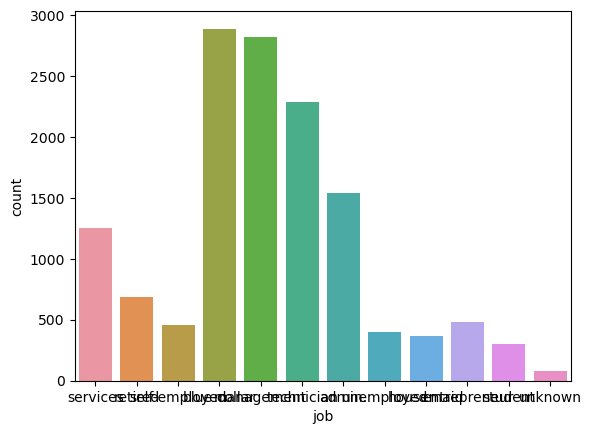

In [93]:
subs = sns.countplot(x='job',data=data)
plt.show()

In [94]:
data['marital'].value_counts()

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

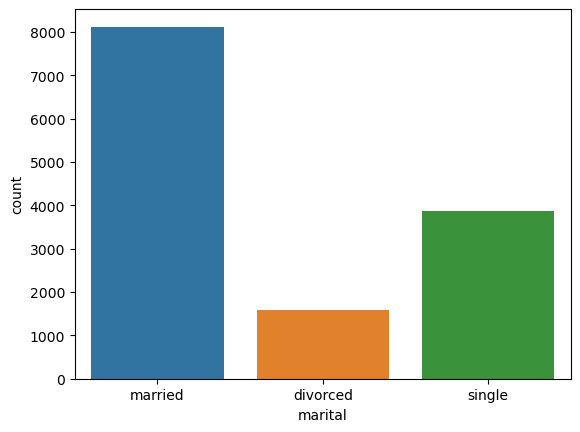

In [95]:
subs = sns.countplot(x='marital',data=data)
plt.show()

In [96]:
data['education'].value_counts()

secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64

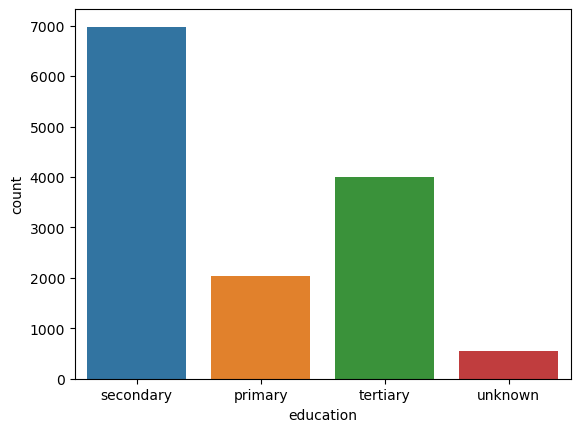

In [97]:
subs = sns.countplot(x='education',data=data)
plt.show()

In [98]:
data['default'].value_counts()

no     13334
yes      230
Name: default, dtype: int64

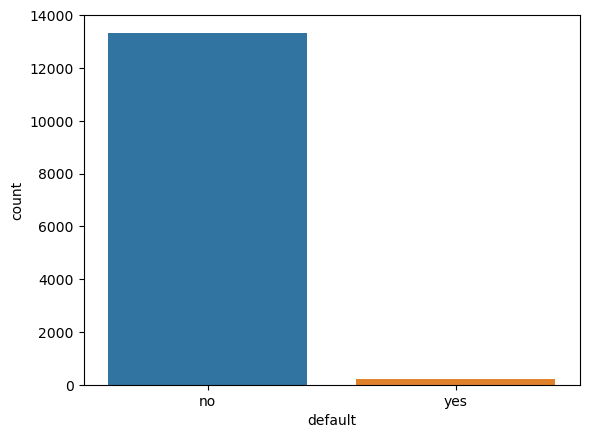

In [99]:
subs = sns.countplot(x='default',data=data)
plt.show()

In [100]:
data['housing'].value_counts()

yes    7546
no     6018
Name: housing, dtype: int64

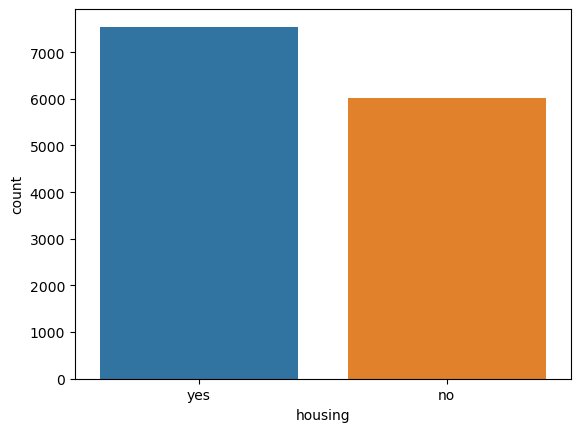

In [101]:
subs = sns.countplot(x='housing',data=data)
plt.show()

In [102]:
data['loan'].value_counts()

no     11451
yes     2113
Name: loan, dtype: int64

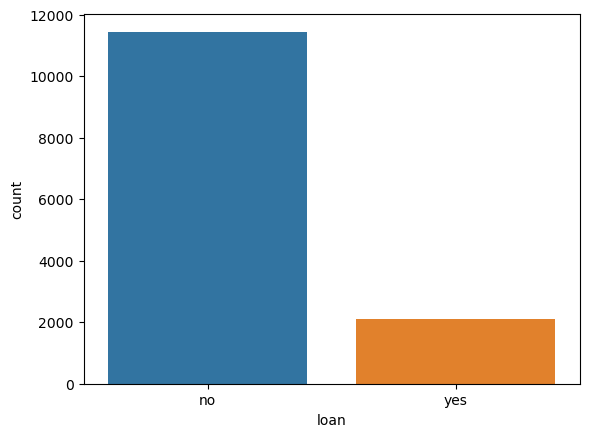

In [103]:
subs = sns.countplot(x='loan',data=data)
plt.show()

In [104]:
data['contact'].value_counts()

cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64

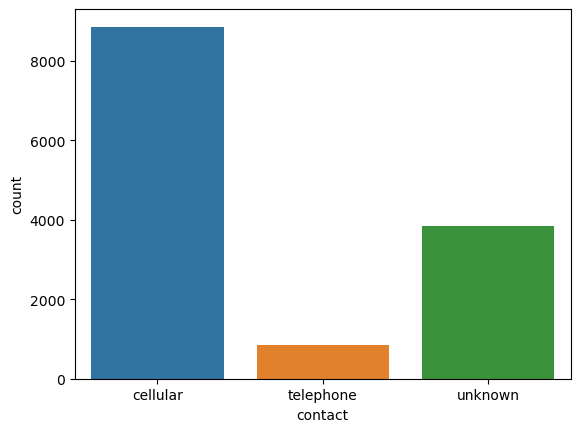

In [105]:
subs = sns.countplot(x='contact',data=data)
plt.show()

In [106]:
data['month'].value_counts()

may    4097
jul    2051
aug    1914
jun    1603
nov    1187
apr     877
feb     822
jan     426
oct     226
sep     169
mar     135
dec      57
Name: month, dtype: int64

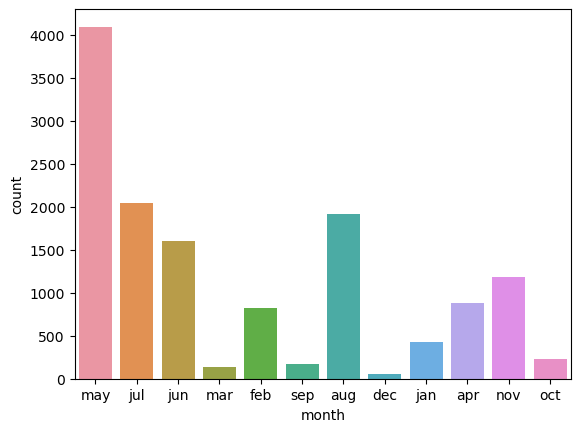

In [107]:
subs = sns.countplot(x='month',data=data)
plt.show()

In [108]:
data['poutcome'].value_counts()

unknown    11030
failure     1539
other        552
success      443
Name: poutcome, dtype: int64

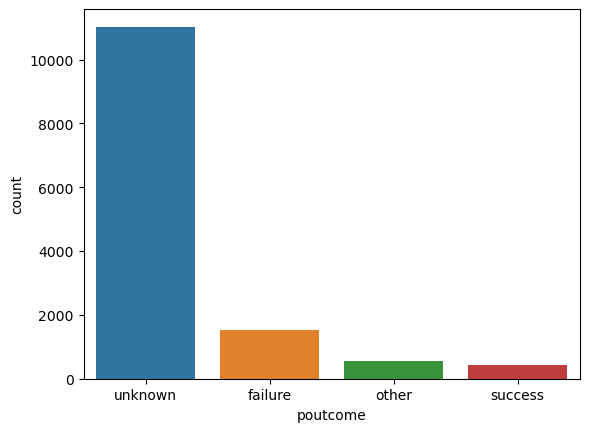

In [109]:
subs = sns.countplot(x='poutcome',data=data)
plt.show()

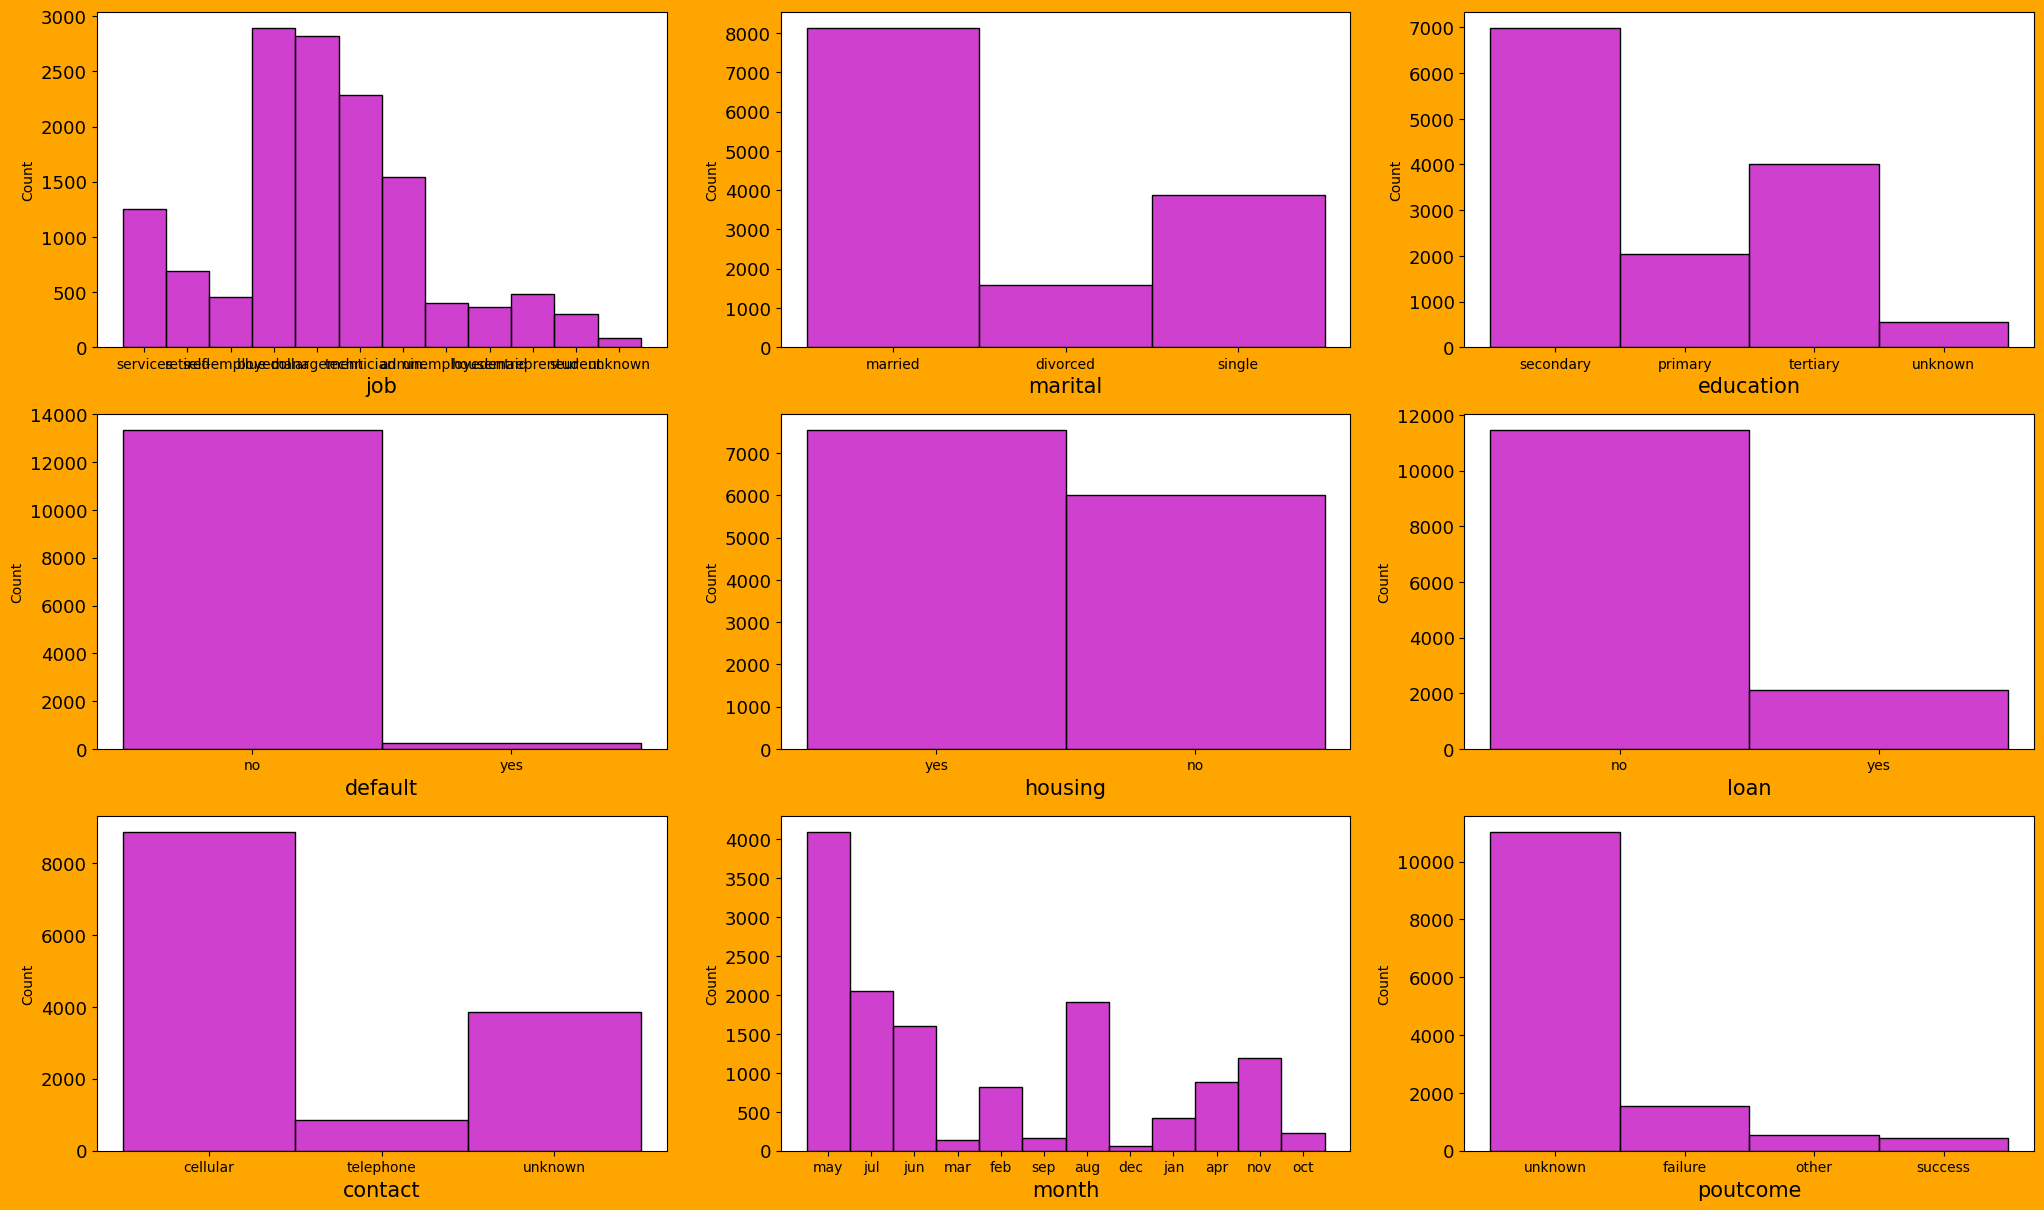

In [110]:
plt.figure(figsize = (25, 20), facecolor = 'orange')
plotnumber = 1
for col in categorical_col:
    if plotnumber<=10:
        ax=plt.subplot(4,3, plotnumber)
        sns.histplot(data[col],color = "m")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.show()

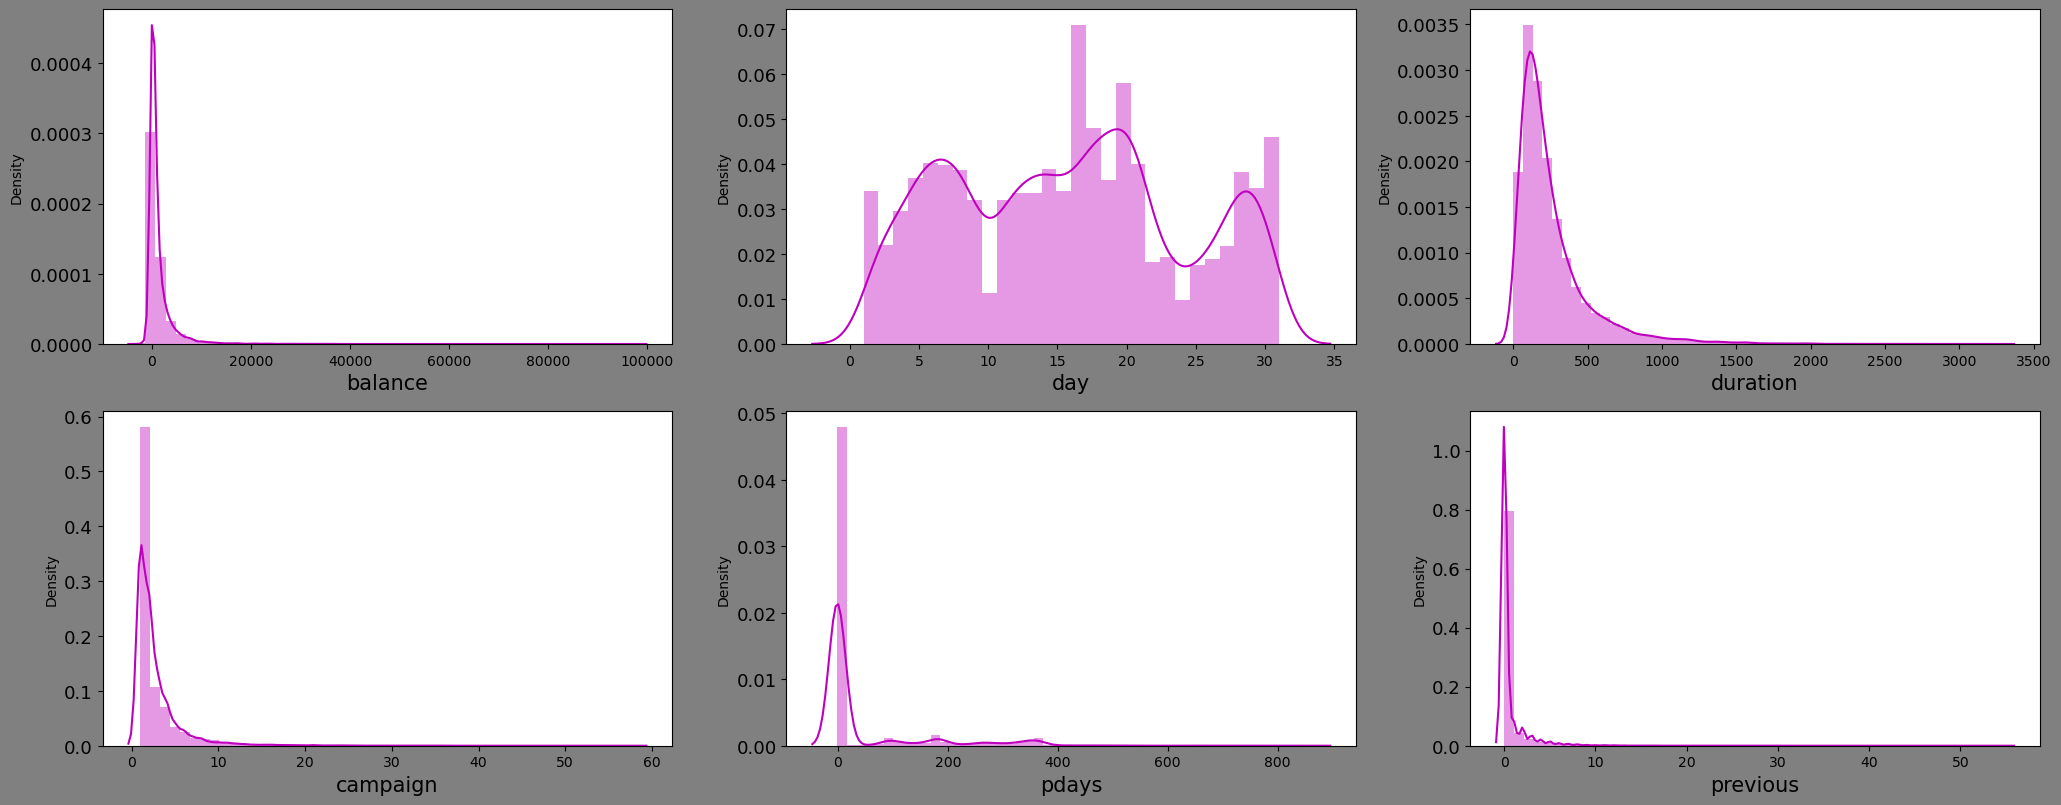

In [111]:
plt.figure(figsize = (25, 20), facecolor = 'grey')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,3, plotnumber)
        sns.distplot(data[col],color = "m")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.show()

In [112]:
from sklearn.preprocessing import OrdinalEncoder

In [113]:
ord_enc = OrdinalEncoder()
for i in data.columns:
    if data [i].dtypes=='object':
        data[i] = ord_enc.fit_transform(data[i].values.reshape(-1,1))
data

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [114]:
data.dtypes

job          float64
marital      float64
education    float64
default      float64
balance        int64
housing      float64
loan         float64
contact      float64
day            int64
month        float64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome     float64
dtype: object

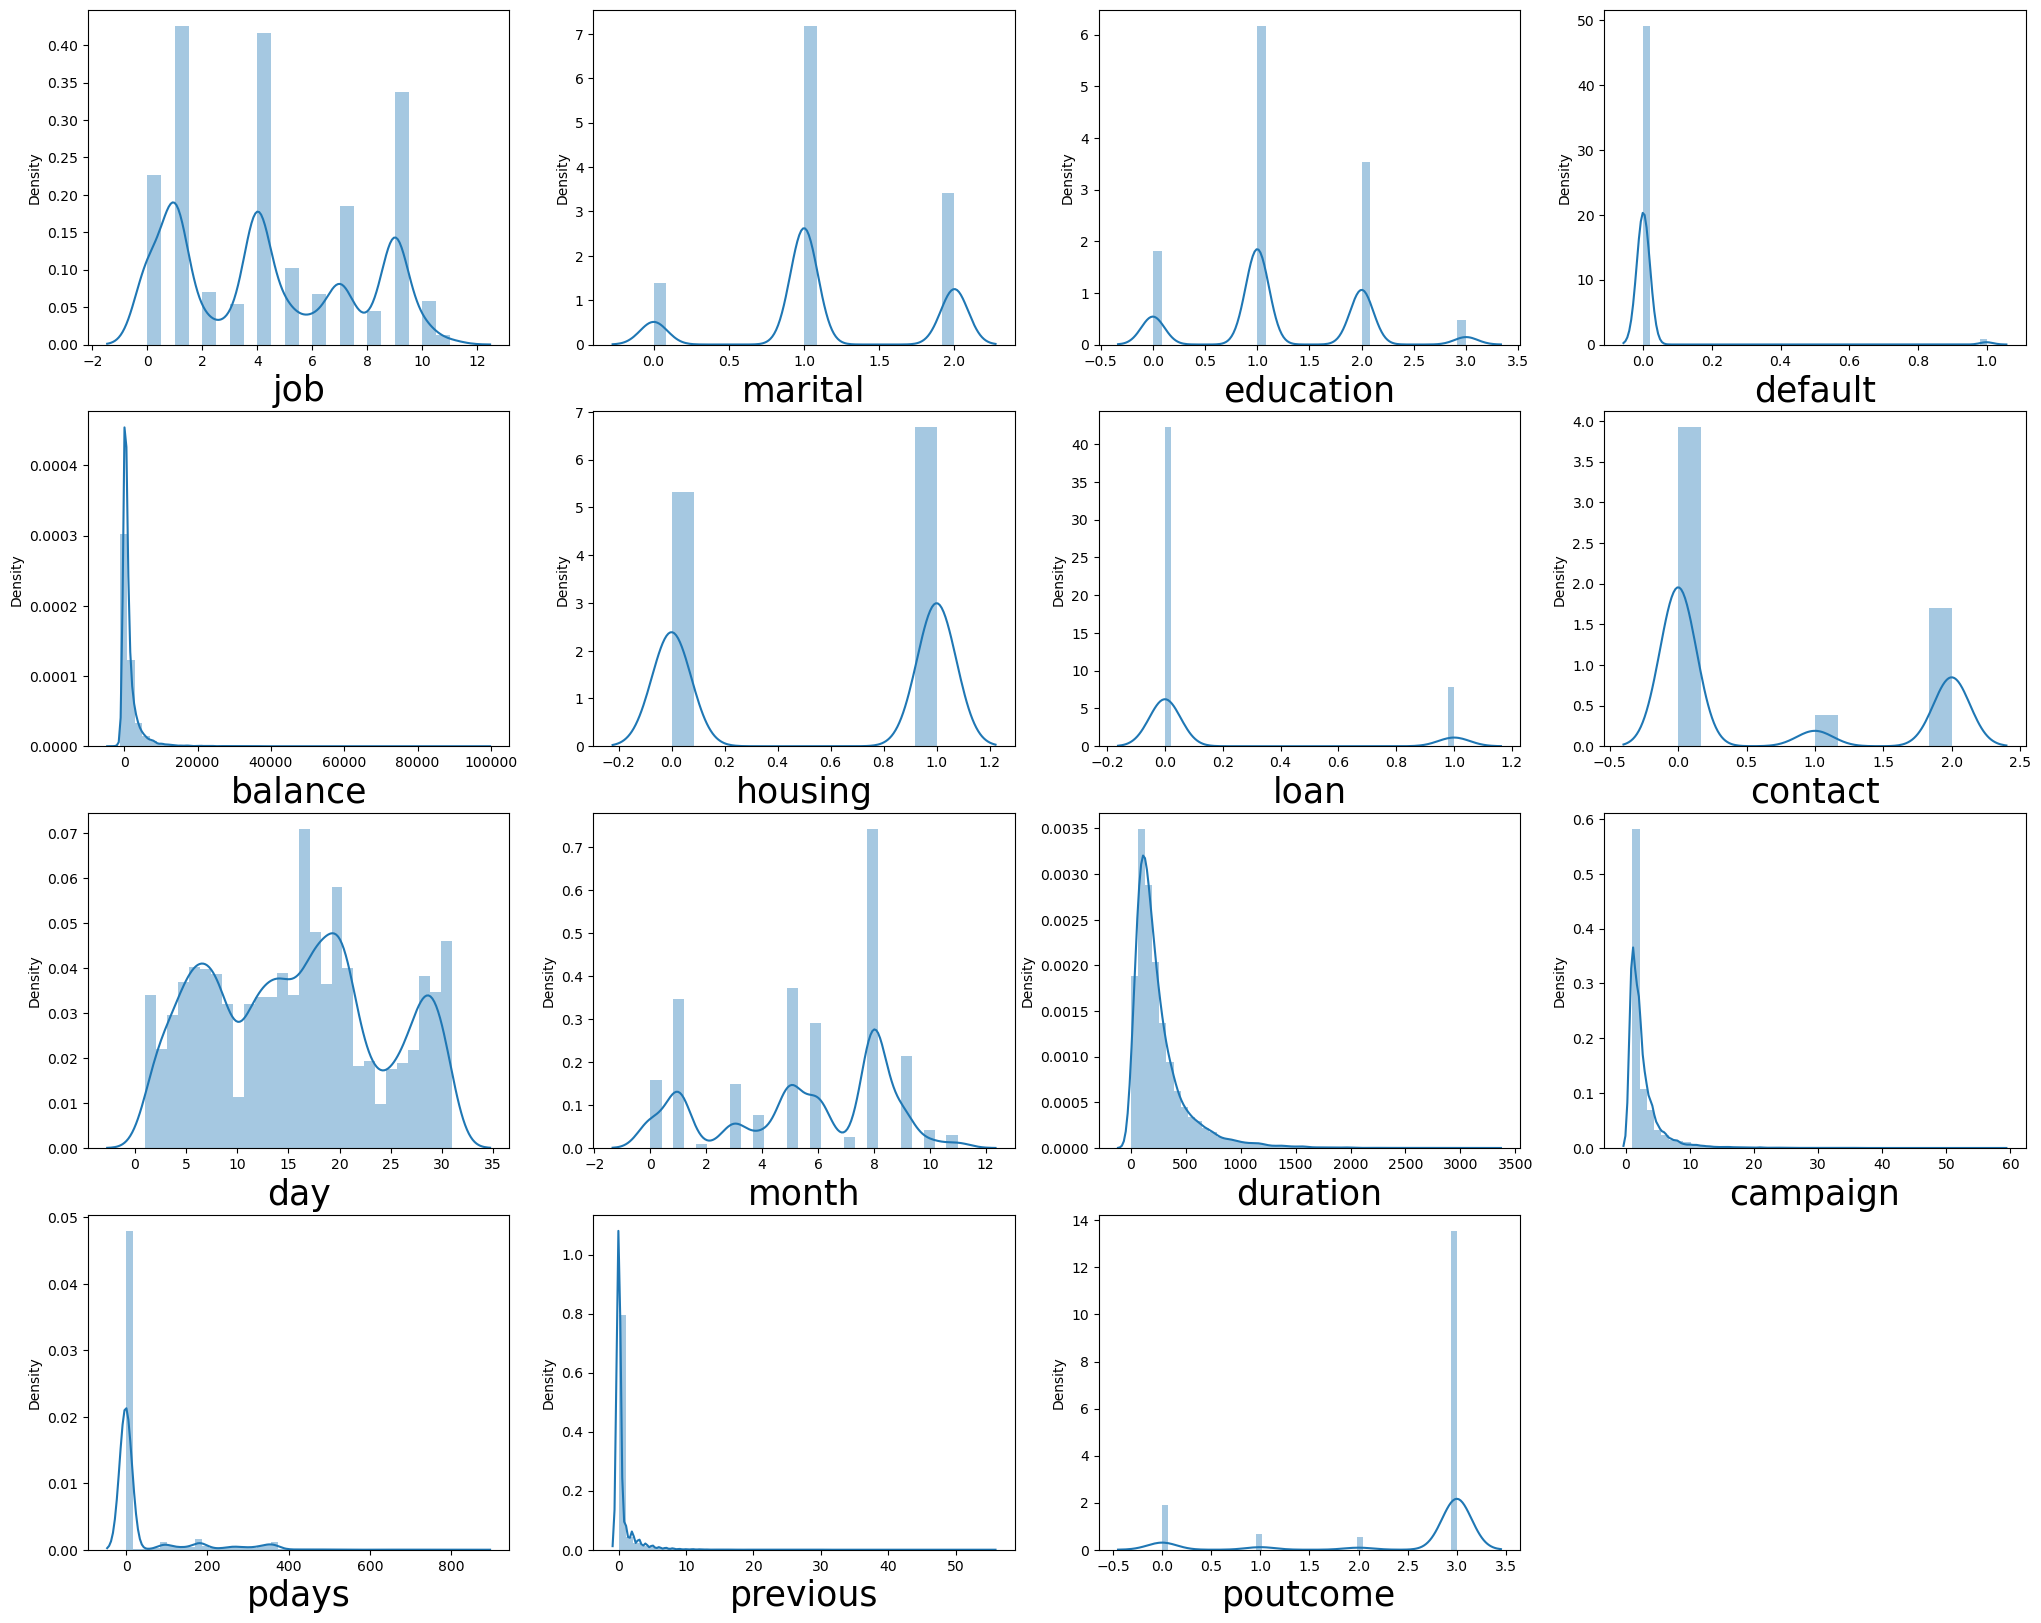

In [115]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

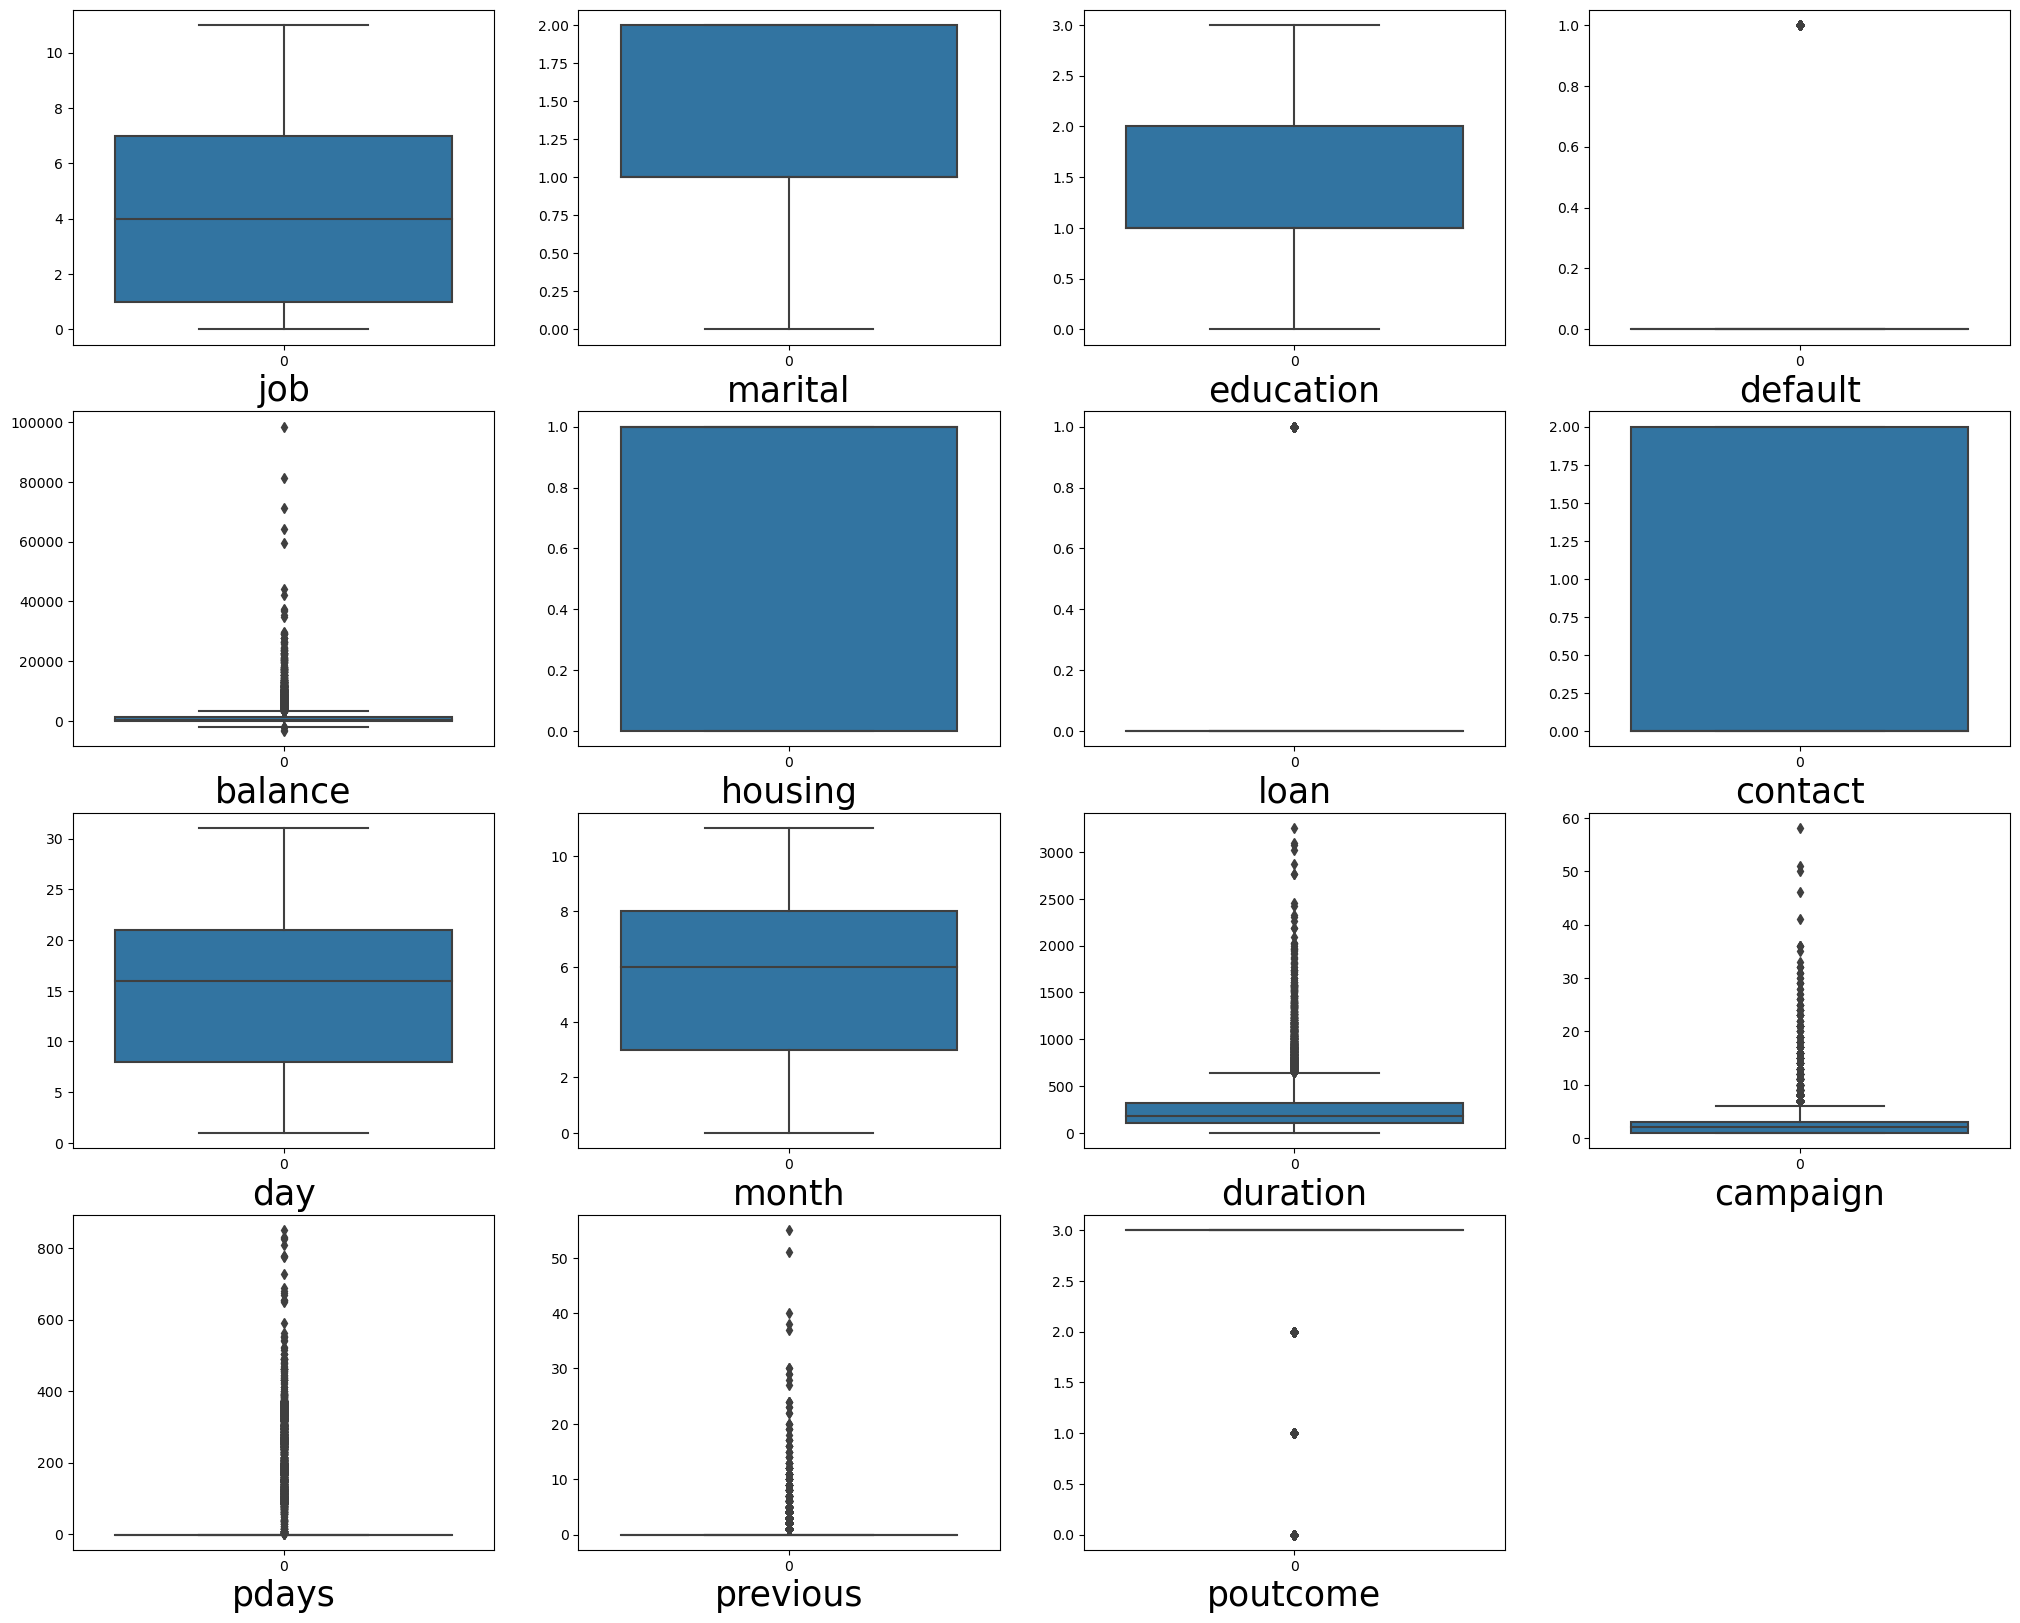

In [116]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

In [117]:
data.skew()

job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

In [118]:
data['pdays']= np.cbrt(data['pdays'])
data['default']= np.cbrt(data['default'])
data['balance']= np.cbrt(data['balance'])
data['loan']= np.cbrt(data['loan'])
data['duration']= np.cbrt(data['duration'])
data['campaign']= np.cbrt(data['campaign'])
data['previous']= np.cbrt(data['previous'])
data['poutcome']= np.cbrt(data['poutcome'])

In [119]:
data.skew()

job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance     -0.059591
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     0.624285
campaign     1.618080
pdays        1.722786
previous     2.005334
poutcome    -2.282264
dtype: float64

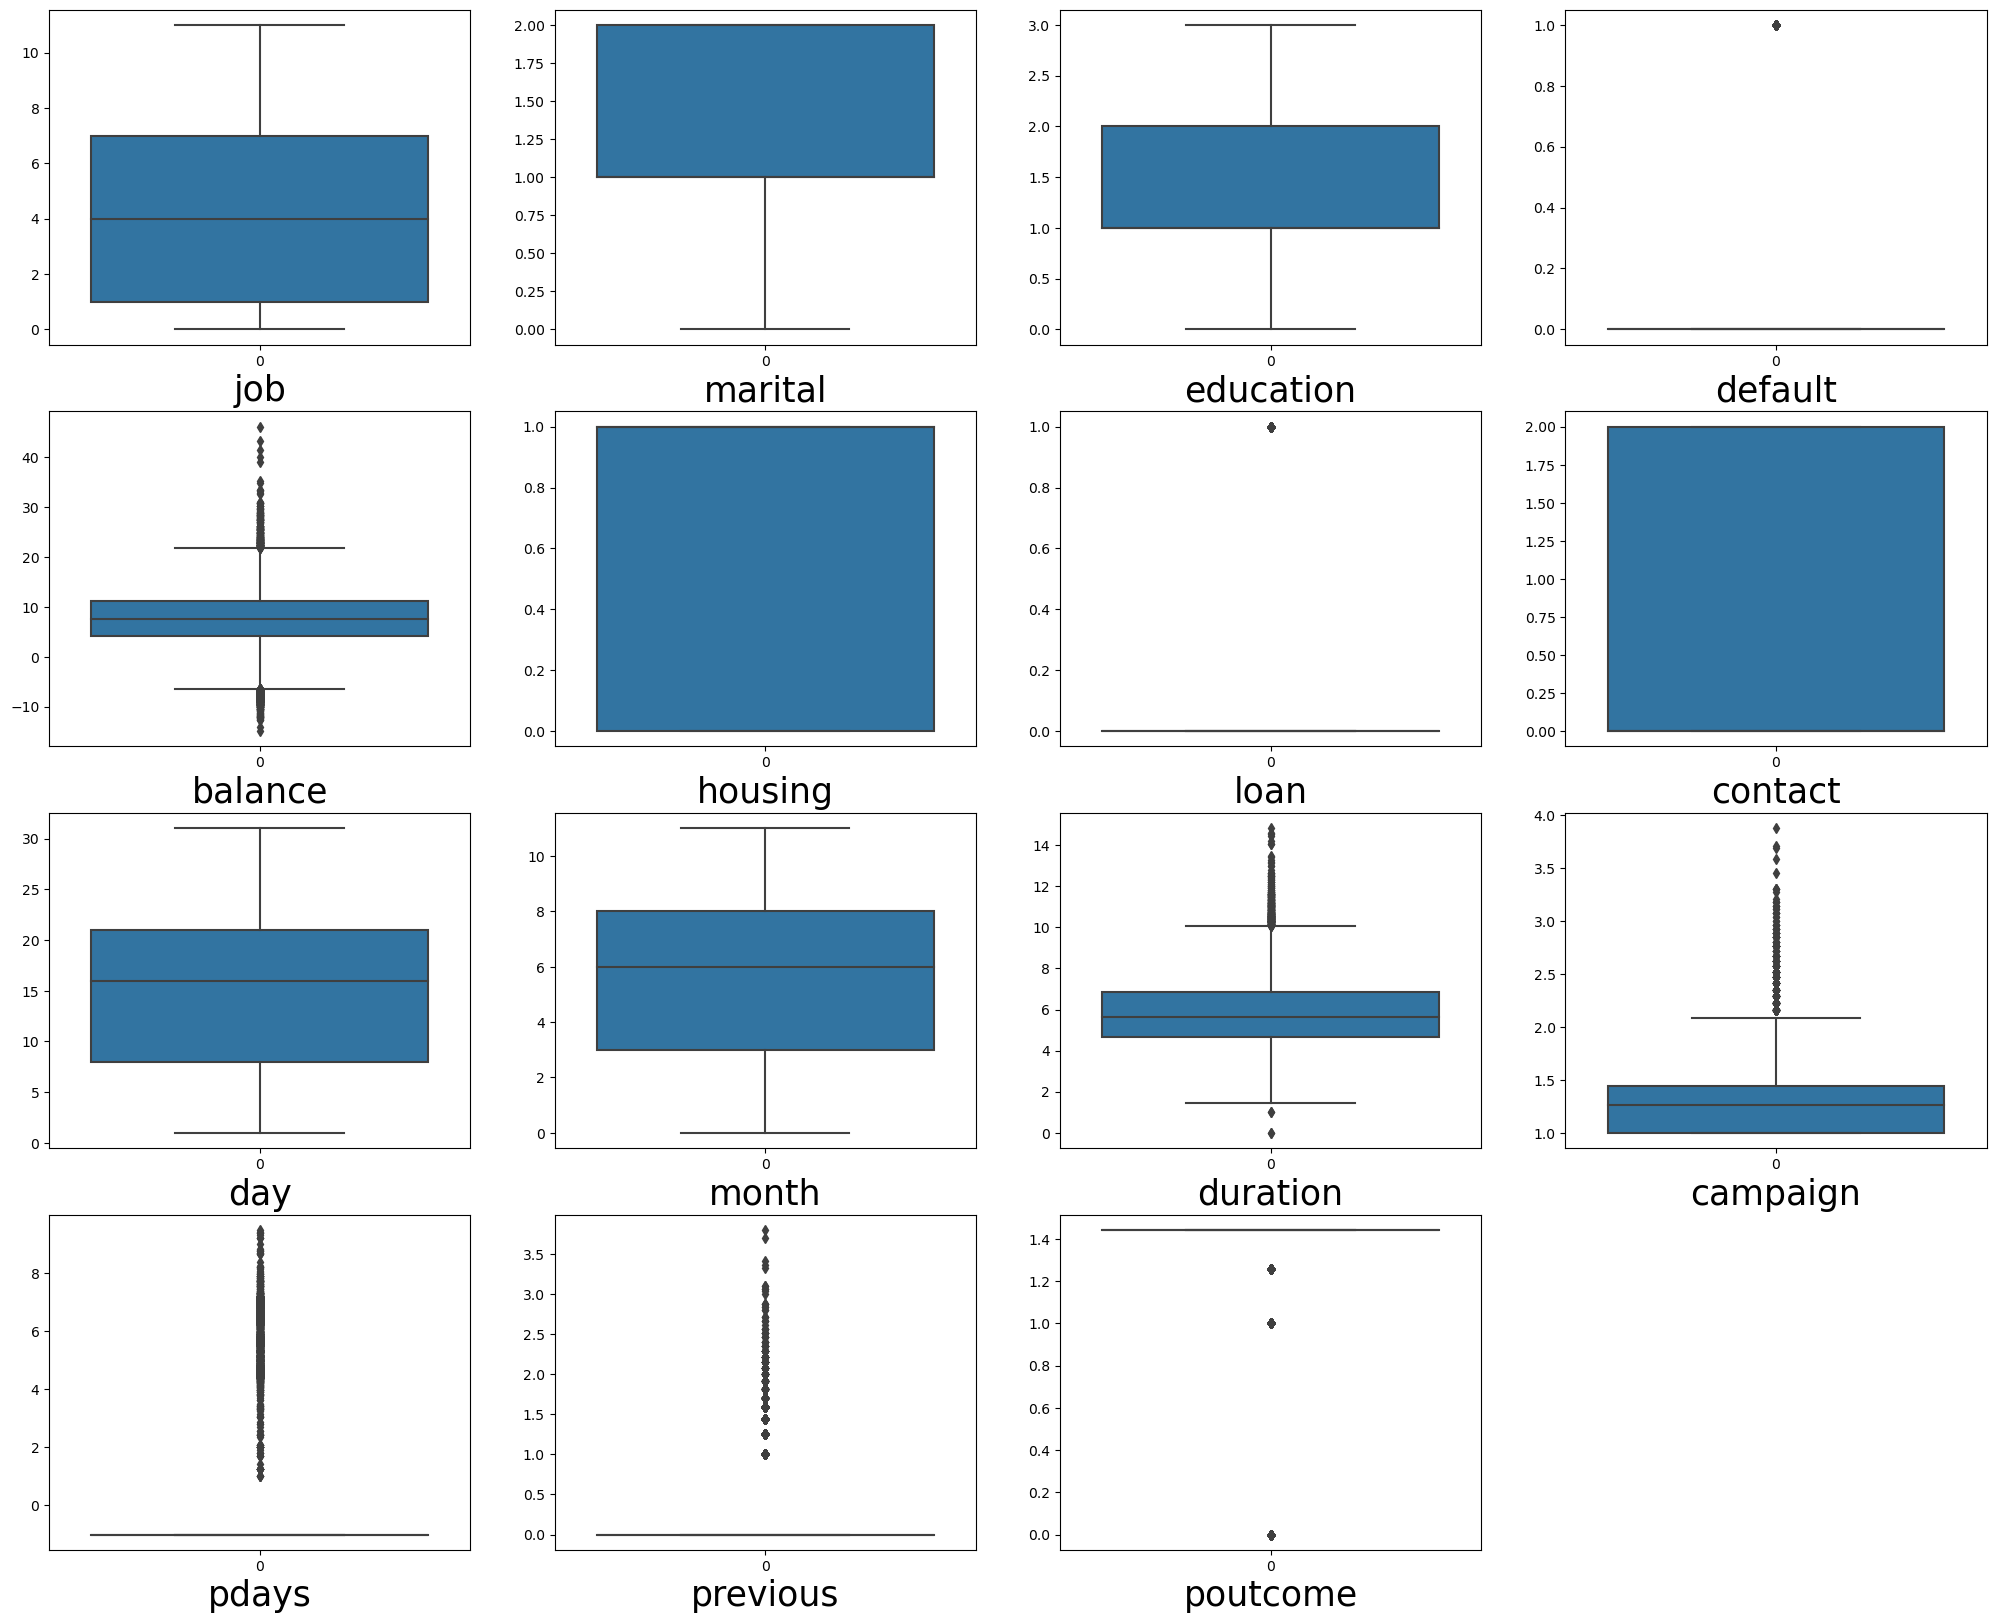

In [120]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

In [121]:
data.dtypes

job          float64
marital      float64
education    float64
default      float64
balance      float64
housing      float64
loan         float64
contact      float64
day            int64
month        float64
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome     float64
dtype: object

In [122]:
import pickle
lm = pickle.load(open('bankpredictiontrain.pkl','rb'))
result = lm.score(x_test, y_test)
print(result)

0.8950263311878291


In [123]:
lm=pickle.load(open('bankpredictiontrain.pkl','rb'))
result = lm.predict(data)
print(result)

[0. 0. 0. ... 0. 0. 0.]


In [124]:
df=pd.DataFrame(result)

In [125]:
df

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
13559,0.0
13560,0.0
13561,0.0
13562,0.0


In [126]:
df.value_counts()

0.0    13475
1.0       89
dtype: int64